# Beam Static Solution - Loads Combos
## *Matteo Franzoi* - Anno Accademico 2019/2020
### matricola 166788 (triennale)
---

In [1]:
import math
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from sympy import MatrixSymbol, Matrix
import numpy as np
from engineering_notation import EngNumber
from decimal import Decimal
import pandas as pd

In [2]:
q1 = Symbol('q1', positive=True);
q2 = Symbol('q2', positive=True);
q3 = Symbol('q3', positive=True);
q4 = Symbol('q4', positive=True);
q5 = Symbol('q5', positive=True);
q6 = Symbol('q6', positive=True);
#---------------------------------
ej = Symbol('ej', positive=True);
#---------------------------------
l1 = Symbol('l1', positive=True);
l2 = Symbol('l2', positive=True);
l3 = Symbol('l3', positive=True);
l4 = Symbol('l4', positive=True);
l5 = Symbol('l5', positive=True);
l6 = Symbol('l6', positive=True);
#---------------------------------
m1 = Symbol('m1');
m2 = Symbol('m2');
m3 = Symbol('m3');
m4 = Symbol('m4');
m5 = Symbol('m5');
m6 = Symbol('m6');
m7 = Symbol('m7');

In [3]:
F = 1/(6*ej) * Matrix([
    [ 2*(l1 + l2), l2, 0, 0, 0],
    [ l2, 2*(l2+l3), l3, 0, 0],
    [ 0, l3, 2*(l3+l4), l4, 0],
    [ 0, 0, l4, 2*(l4+l5), l5],
    [ 0, 0, 0, l5, 2*(l5+l6)]
])

In [4]:
Matrix(F)

Matrix([
[(2*l1 + 2*l2)/(6*ej),            l2/(6*ej),                    0,                    0,                    0],
[           l2/(6*ej), (2*l2 + 2*l3)/(6*ej),            l3/(6*ej),                    0,                    0],
[                   0,            l3/(6*ej), (2*l3 + 2*l4)/(6*ej),            l4/(6*ej),                    0],
[                   0,                    0,            l4/(6*ej), (2*l4 + 2*l5)/(6*ej),            l5/(6*ej)],
[                   0,                    0,                    0,            l5/(6*ej), (2*l5 + 2*l6)/(6*ej)]])

In [5]:
X = Matrix([ m2, m3, m4, m5, m6])
Matrix(X)

Matrix([
[m2],
[m3],
[m4],
[m5],
[m6]])

In [6]:
P = -1/(24*ej) * Matrix([
    q1*l1**3 + q2*l2**3,
    q2*l2**3 + q3*l3**3,
    q3*l3**3 + q4*l4**3, 
    q4*l4**3 + q5*l5**3, 
    q5*l5**3 + q6*l6**3            
])
Matrix(P)

Matrix([
[-(l1**3*q1 + l2**3*q2)/(24*ej)],
[-(l2**3*q2 + l3**3*q3)/(24*ej)],
[-(l3**3*q3 + l4**3*q4)/(24*ej)],
[-(l4**3*q4 + l5**3*q5)/(24*ej)],
[-(l5**3*q5 + l6**3*q6)/(24*ej)]])

In [7]:
def rij_q(mij, mi_j, li, qi):
       return (mi_j - mij)/li + qi* li/2
    
def rij(mij, mi_j, li):
    return (mi_j-mij)/li 


In [8]:
# E = 31476 MPa

def EJ(b,h, E):
    """Concrete Rectangular Section:
    J = b * h^3 / 12 [mm^4]
    E = 31476 [MPa]
    Result in N*mm^2"""
    return E * b * h**3 /12
    
EJ = EJ(300, 500, 31476)/1000
print('EJ = ',EJ, 'kN mm^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN mm^2')
EJ = EJ*10**-6 
print('EJ = ',EJ, 'kN m^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN m^2')

EJ =  98362500000.0 kN mm^2 =  98.3625E+9 kN mm^2
EJ =  98362.5 kN m^2 =  98362.5 kN m^2


In [9]:
F1 = F.evalf(subs={l1:3.000, l2:4.500, l3:4.000, l4:5.000, l5:6.150, l6:4.000, ej:EJ})
Fn = F1;
F1

Matrix([
[ 2.5416190113102e-5, 7.62485703393061e-6,                   0,                   0,                   0],
[7.62485703393061e-6, 2.88050154615157e-5, 6.77765069682721e-6,                   0,                   0],
[                  0, 6.77765069682721e-6, 3.04994281357225e-5, 8.47206337103402e-6,                   0],
[                  0,                   0, 8.47206337103402e-6, 3.77854026348117e-5, 1.04206379463718e-5],
[                  0,                   0,                   0, 1.04206379463718e-5, 3.43965772863981e-5]])

In [10]:
P1 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3.000, 4.500, 4.000, 5.000, 6.150, 4.000, EJ, 1, 0, 0, 0, 0, 0])))
P1

Matrix([
[-1.14372855508959e-5],
[                   0],
[                   0],
[                   0],
[                   0]])

In [11]:
sol1 = solve(F1 * X - P1, X)
X1 = list(sol1.values())
X1.insert(0, 0)
X1.insert(6, 0)
Matrix(X1)

Matrix([
[                   0],
[    -0.4913369425523],
[   0.137789808507666],
[ -0.0328526257862428],
[ 0.00803760602434186],
[-0.00243503827831046],
[                   0]])

In [12]:
R11 = rij_q(X1[0], X1[1], 3, 1);
R21 = rij(X1[1], X1[2], 4.5);
R31 = rij(X1[2], X1[3], 4);
R41 = rij(X1[3], X1[4], 5);
R51 = rij(X1[4], X1[5], 6.15);
R61 = rij(X1[5], X1[6], 4);
R1 = np.array([R11, R21, R31, R41, R51, R61])
Matrix(R1)

Matrix([
[    1.33622101914923],
[   0.139805944679992],
[ -0.0426606085734771],
[ 0.00817804636211693],
[-0.00170286899230119],
[0.000608759569577614]])

In [13]:
def H(s):
    if s <= 0:
        return 0
    else:
        return 1
Hv = np.vectorize(H)

In [14]:
s = np.linspace(0,26.65, num=1000)
M1 = (X1[0] + R1[0] * s - s**2 /2) * (Hv(s) - Hv(s-3)) + (X1[1] + R1[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X1[2] + R1[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X1[3] + R1[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X1[4] + R1[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X1[5] + R1[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

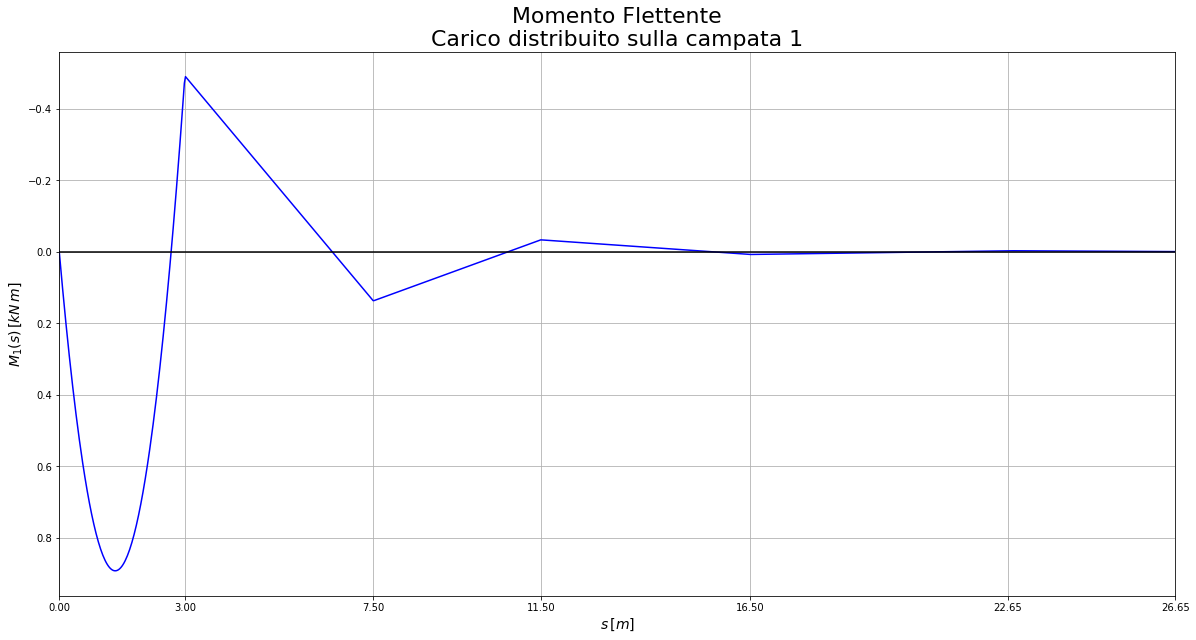

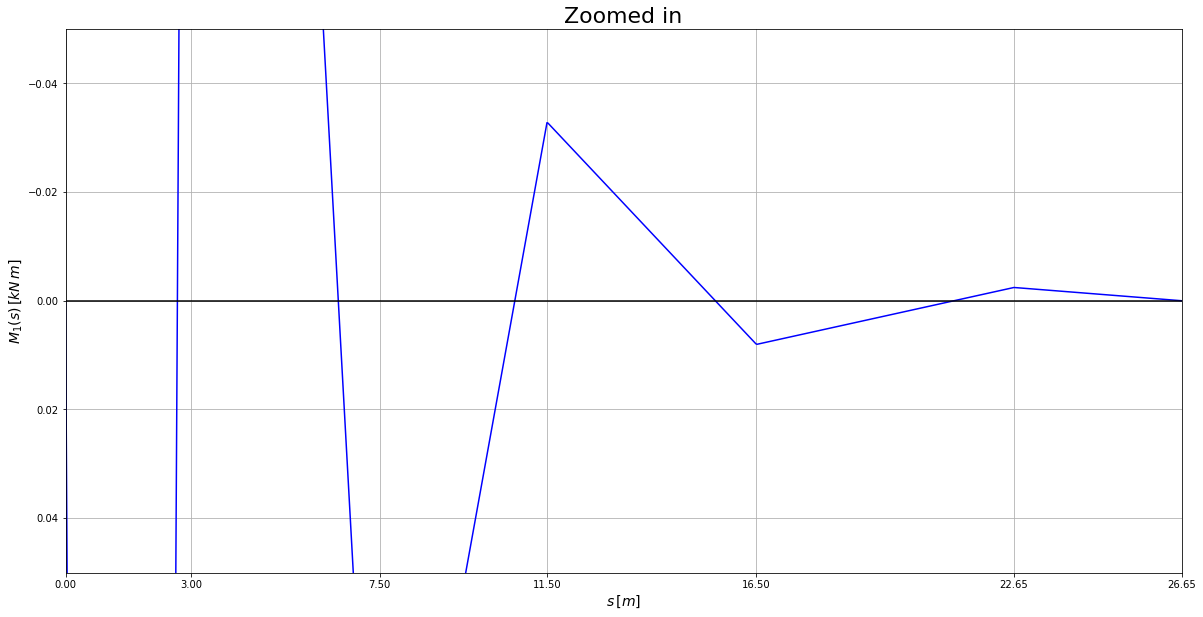

In [15]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCarico distribuito sulla campata 1', fontsize='22')
plt.savefig('export/img/bendingMoment_loadSpan_1.jpg')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M1, color='blue')
ax3.set_xlim(15, 26.65) 
ax3.set_ylim(-.05, .05)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 2

In [16]:
P2 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 1, 0, 0, 0, 0])))
P2

Matrix([
[-3.86008387342737e-5],
[-3.86008387342737e-5],
[                   0],
[                   0],
[                   0]])

In [17]:
sol2 = solve(Fn * X - P2, X)
X2 = list(sol2.values())
X2.insert(0, 0)
X2.insert(6, 0)
Matrix(X2)

Matrix([
[                  0],
[  -1.19322157740064],
[  -1.08509474199787],
[  0.258714428066662],
[-0.0632961474416921],
[ 0.0191759264416948],
[                  0]])

In [18]:
R12 = rij(X2[0], X2[1], 3);
R22 = rij_q(X2[1], X2[2], 4.5, 1);
R32 = rij(X2[2], X2[3], 4);
R42 = rij(X2[3], X2[4], 5);
R52 = rij(X2[4], X2[5], 6.15);
R62 = rij(X2[5], X2[6], 4);
R2 = np.array([R12, R22, R32, R42, R52, R62])
Matrix(R2)

Matrix([
[ -0.397740525800214],
[   2.27402818564506],
[  0.335952292516132],
[-0.0644021151016708],
[ 0.0134100933143719],
[-0.0047939816104237]])

In [19]:
s = np.linspace(0,26.65, num=1000)
M2 = (X2[0] + R2[0] * s) * (Hv(s) - Hv(s-3)) + (X2[1] + R2[1]*(s-3) - 1*(s-3)**2 /2) * (Hv(s-3) - Hv(s-(3+4.5))) + (X2[2] + R2[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X2[3] + R2[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X2[4] + R2[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X2[5] + R2[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

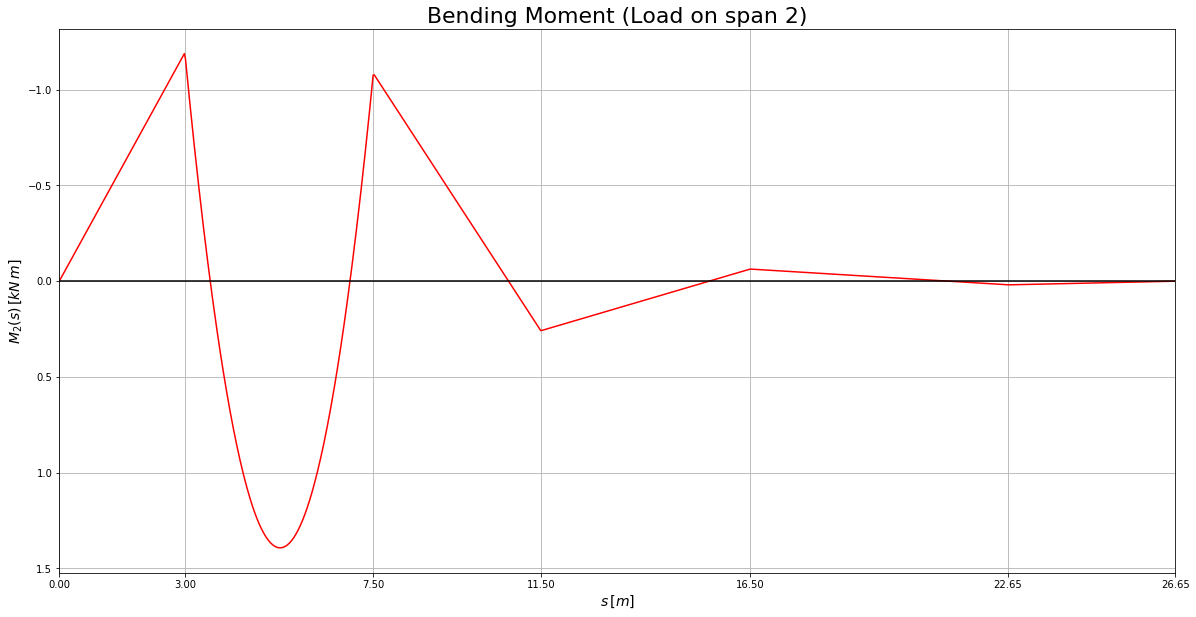

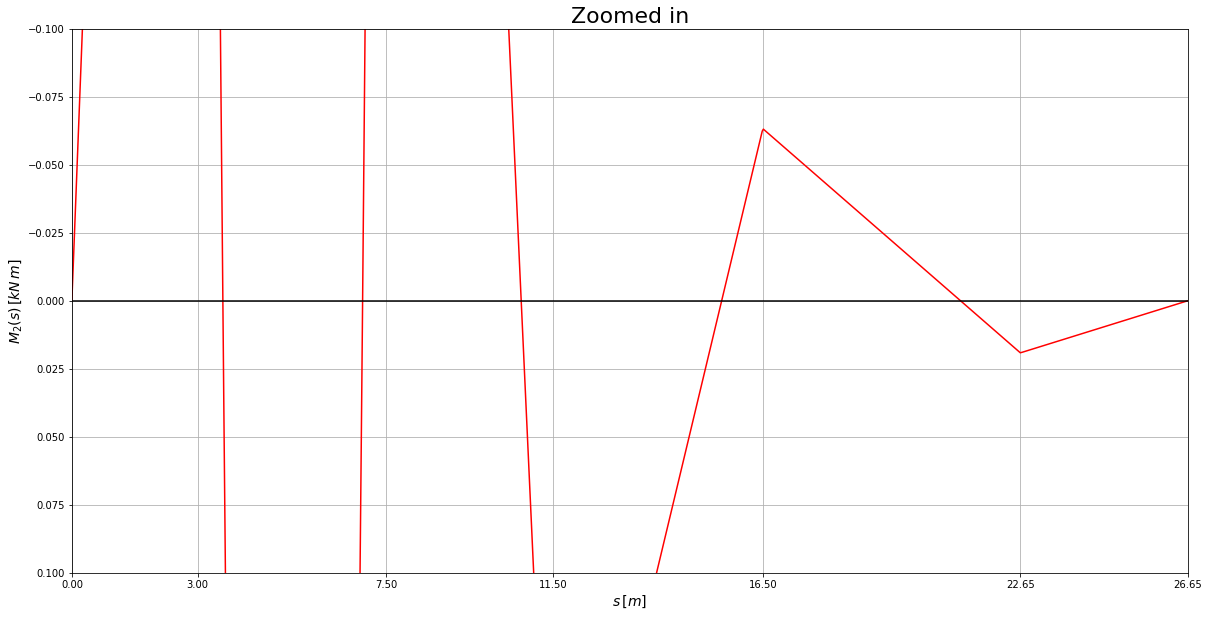

In [20]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 2)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M2, color='red')
ax3.set_xlim(16, 26.65) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 3

In [21]:
P3 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 1, 0, 0, 0])))
P3

Matrix([
[                   0],
[-2.71106027873088e-5],
[-2.71106027873088e-5],
[                   0],
[                   0]])

In [22]:
sol3 = solve(Fn * X - P3, X)
X3 = list(sol3.values())
X3.insert(0, 0)
X3.insert(6, 0)
Matrix(X3)

Matrix([
[                  0],
[  0.248739988673002],
[ -0.829133295576673],
[ -0.756015981056255],
[  0.184964168263867],
[-0.0560359426021074],
[                  0]])

In [23]:
R13 = rij(X3[0], X3[1], 3);
R23 = rij(X3[1], X3[2], 4.5);
R33 = rij_q(X3[2], X3[3], 4, 1);
R43 = rij(X3[3], X3[4], 5);
R53 = rij(X3[4], X3[5], 6.15);
R63 = rij(X3[5], X3[6], 4);
R3 = np.array([R13, R23, R33, R43, R53, R63])
Matrix(R3)

Matrix([
[ 0.0829133295576674],
[ -0.239527396499928],
[    2.0182793286301],
[  0.188196029864025],
[-0.0391870098969064],
[ 0.0140089856505268]])

In [24]:
s = np.linspace(0,26.65, num=1000)
M3 = (X3[0] + R3[0] * s) * (Hv(s) - Hv(s-3)) + (X3[1] + R3[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X3[2] + R3[2]*(s-(3+4.5)) - 1*(s-(3+4.5))**2 /2)*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X3[3] + R3[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X3[4] + R3[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X3[5] + R3[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

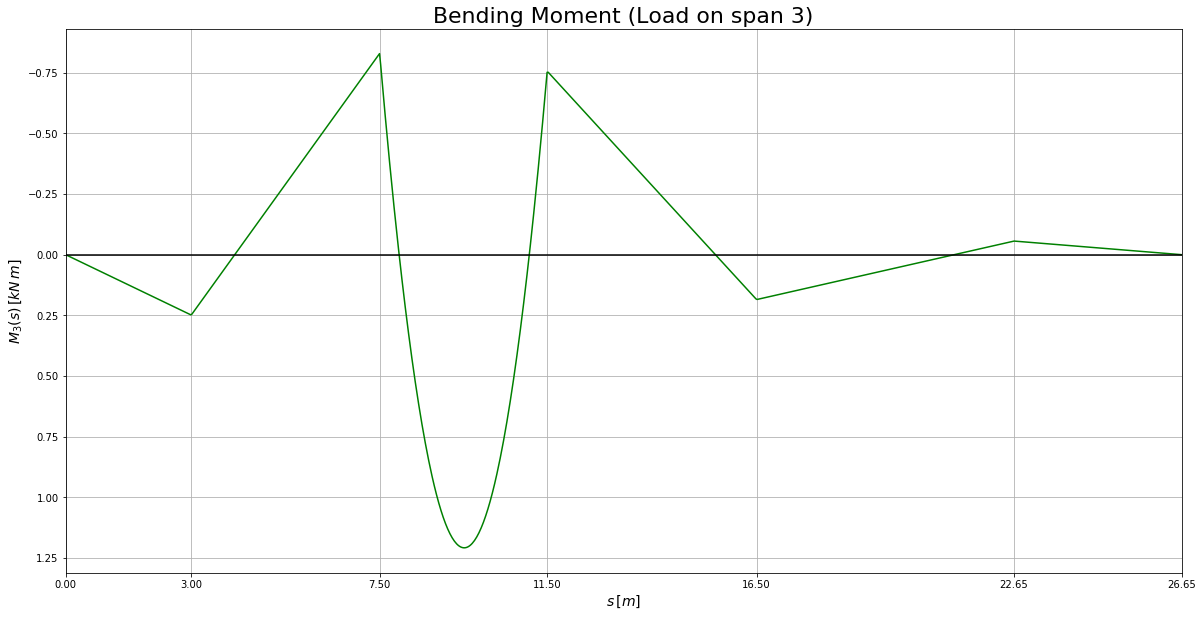

In [25]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M3, color='green')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_3(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 3)', fontsize='22')
plt.show()

---
#### Load on Span 4

In [26]:
P4 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 1, 0, 0])))
P4

Matrix([
[                   0],
[                   0],
[-5.29503960689626e-5],
[-5.29503960689626e-5],
[                   0]])

In [27]:
sol4 = solve(Fn * X - P4, X)
X4 = list(sol4.values())
X4.insert(0, 0)
X4.insert(6, 0)
Matrix(X4)

Matrix([
[                 0],
[-0.114884350749542],
[ 0.382947835831805],
[ -1.49828340769194],
[ -1.16253800097445],
[ 0.352197473201618],
[                 0]])

In [28]:
R14 = rij(X4[0], X4[1], 3);
R24 = rij(X4[1], X4[2], 4.5);
R34 = rij(X4[2], X4[3], 4);
R44 = rij_q(X4[3], X4[4], 5, 1);
R54 = rij(X4[4], X4[5], 6.15);
R64 = rij(X4[5], X4[6], 4);
R4 = np.array([R14, R24, R34, R44, R54, R64])
Matrix(R4)

Matrix([
[-0.0382947835831806],
[  0.110629374795855],
[ -0.470307810880936],
[    2.5671490813435],
[   0.24629845108554],
[-0.0880493683004045]])

In [29]:
s = np.linspace(0,26.65, num=1000)
M4 = (X4[0] + R4[0] * s) * (Hv(s) - Hv(s-3)) + (X4[1] + R4[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X4[2] + R4[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X4[3] + R4[3]*(s-(3+4.5+4)) - 1* (s-(3+4.5+4))**2 /2)* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X4[4] + R4[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X4[5] + R4[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

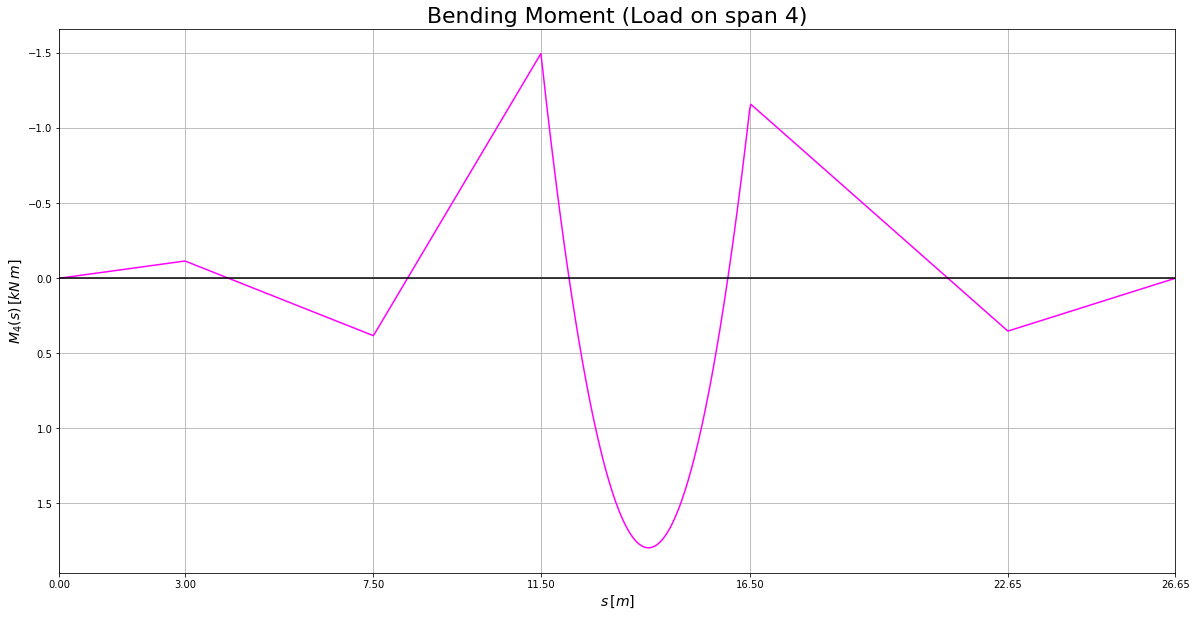

In [30]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M4, color='magenta')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_4(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 4)', fontsize='22')
plt.show()


---
#### Load on Span 5

In [31]:
P5 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 1, 0])))
P5

Matrix([
[                   0],
[                   0],
[                   0],
[-9.85336446816622e-5],
[-9.85336446816622e-5]])

In [32]:
sol5 = solve(Fn * X - P5, X)
X5 = list(sol5.values())
X5.insert(0, 0)
X5.insert(6, 0)
Matrix(X5)

Matrix([
[                 0],
[0.0482668214530289],
[-0.160889404843429],
[ 0.629479796449919],
[ -2.13741574334497],
[ -2.21709295213933],
[                 0]])

In [33]:
R15 = rij(X5[0], X5[1], 3);
R25 = rij(X5[1], X5[2], 4.5);
R35 = rij(X5[2], X5[3], 4);
R45 = rij(X5[3], X5[4], 5);
R55 = rij_q(X5[4], X5[5], 6.15, 1);
R65 = rij(X5[5], X5[6], 4);
R5 = np.array([R15, R25, R35, R45, R55, R65])
Matrix(R5)

Matrix([
[  0.016088940484343],
[-0.0464791613992129],
[  0.197592300323337],
[ -0.553379107958977],
[    3.0620443562936],
[  0.554273238034834]])

In [34]:
s = np.linspace(0,26.65, num=1000)
M5 = (X5[0] + R5[0] * s) * (Hv(s) - Hv(s-3)) + (X5[1] + R5[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X5[2] + R5[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X5[3] + R5[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X5[4] + R5[4]*(s-(3+4.5+4+5)) - 1*(s-(3+4.5+4+5))**2 /2) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X5[5] + R5[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

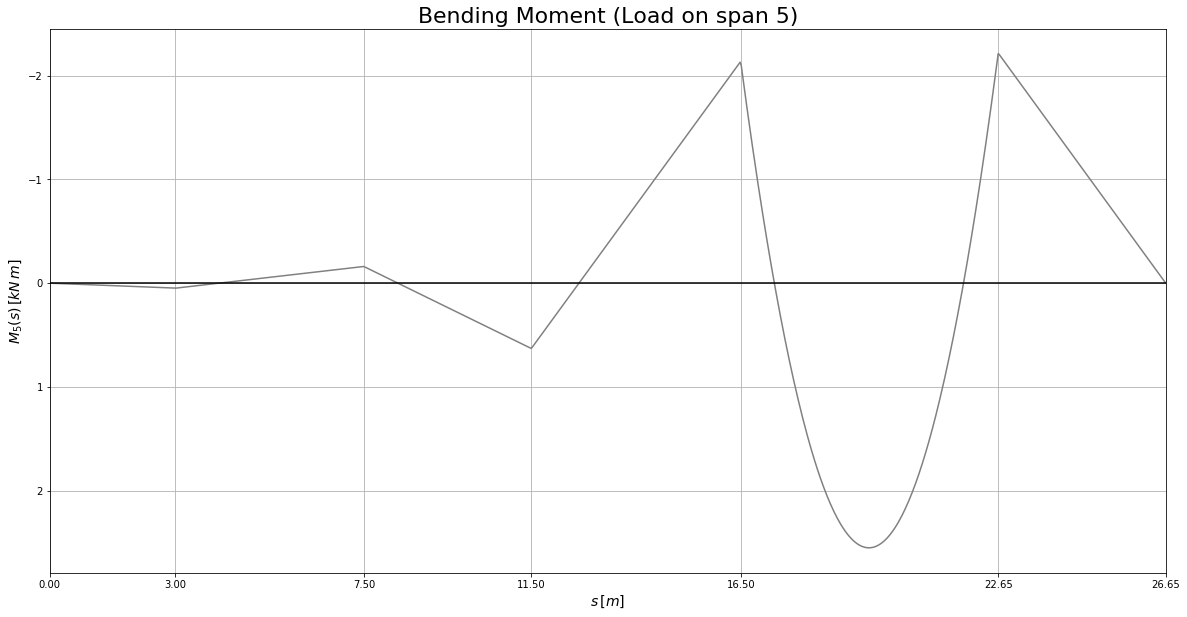

In [35]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M5, color='gray')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_5(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 5)', fontsize='22')
plt.show()

---
#### Load on Span 6

In [36]:
P6 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 0, 1])))
P6

Matrix([
[                   0],
[                   0],
[                   0],
[                   0],
[-2.71106027873088e-5]])

In [37]:
sol6 = solve(Fn * X - P6, X)
X6 = list(sol6.values())
X6.insert(0, 0)
X6.insert(6, 0)
Matrix(X6)

Matrix([
[                   0],
[-0.00577194258562478],
[  0.0192398086187493],
[ -0.0752757512208566],
[   0.255600857500085],
[   -0.86561306766628],
[                   0]])

In [38]:
R16 = rij(X6[0], X6[1], 3);
R26 = rij(X6[1], X6[2], 4.5);
R36 = rij(X6[2], X6[3], 4);
R46 = rij(X6[3], X6[4], 5);
R56 = rij(X6[4], X6[5], 6.15);
R66 = rij_q(X6[5], X6[6], 4, 1);
R6 = np.array([R16, R26, R36, R46, R56, R66])
Matrix(R6)

Matrix([
[-0.00192398086187493],
[ 0.00555816693430534],
[ -0.0236288899599015],
[  0.0661753217441882],
[  -0.182311207344124],
[    2.21640326691657]])

In [39]:
s = np.linspace(0,26.65, num=1000)
M6 = (X6[0] + R6[0] * s) * (Hv(s) - Hv(s-3)) + (X6[1] + R6[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X6[2] + R6[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X6[3] + R6[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X6[4] + R6[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X6[5] + R6[5]*(s-(3+4.5+4+5+6.15)) -  1 *(s-(3+4.5+4+5+6.15))**2 /2) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

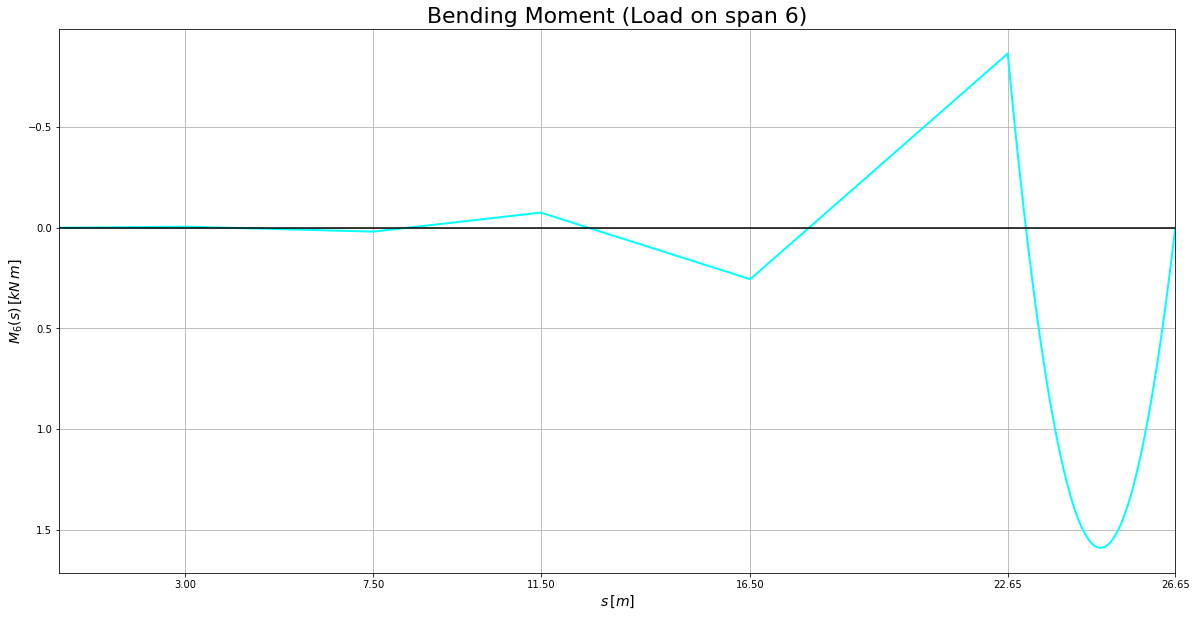

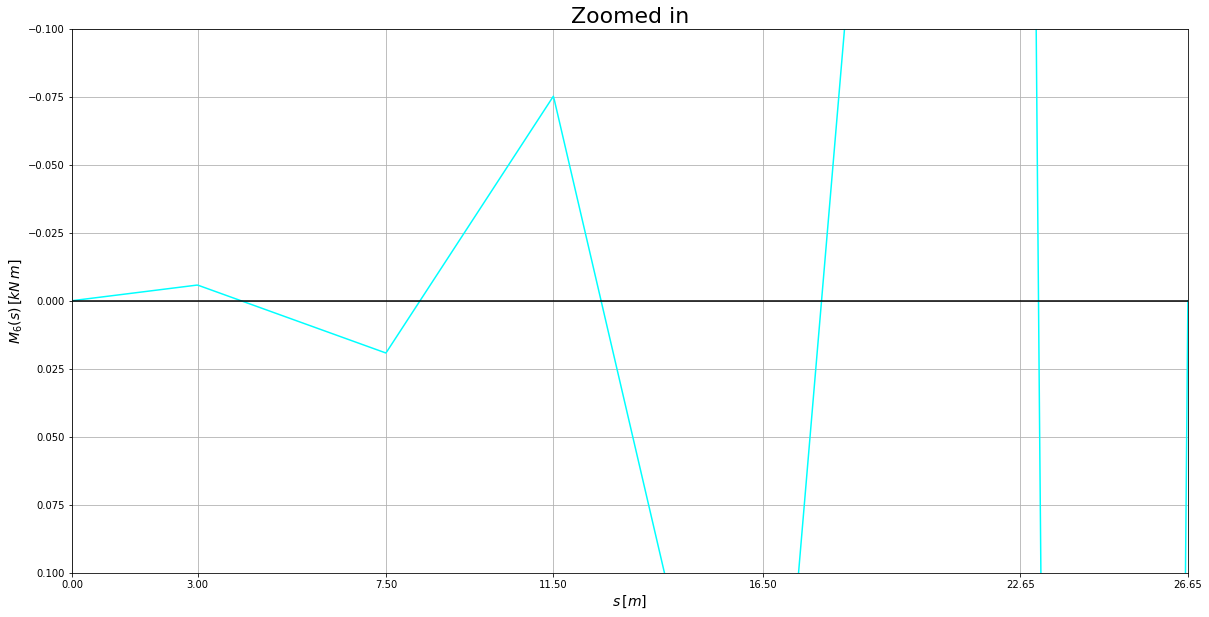

In [40]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M6, color='cyan', linewidth='2')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 6)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M6, color='cyan')
ax3.set_xlim(0, 7.5) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()


---
## SLU

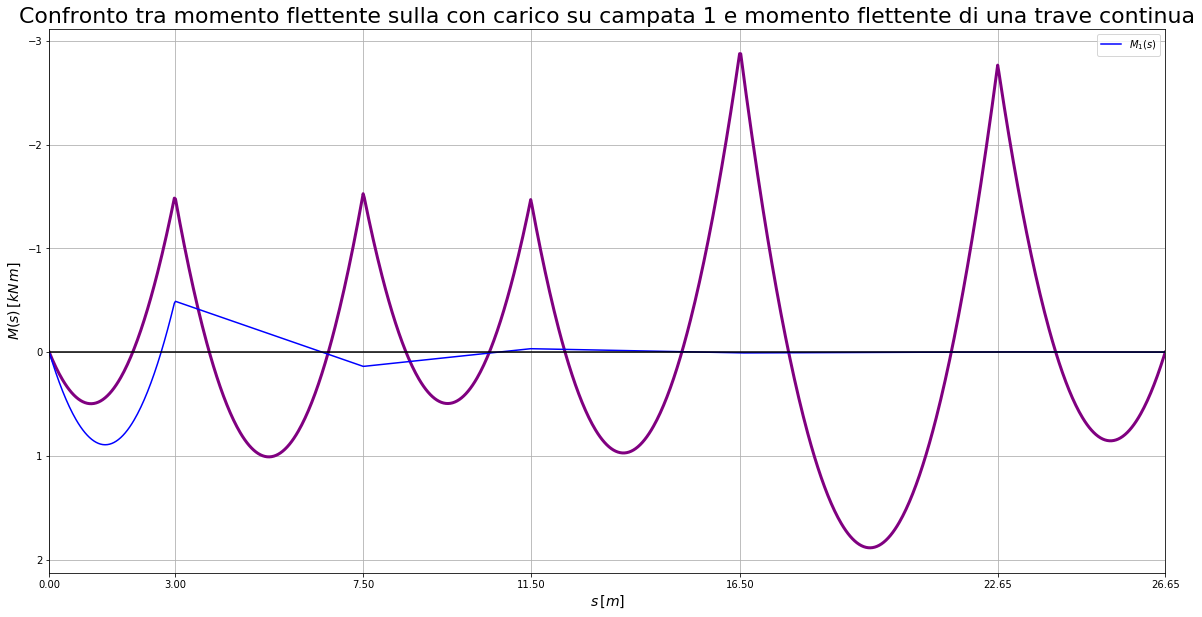

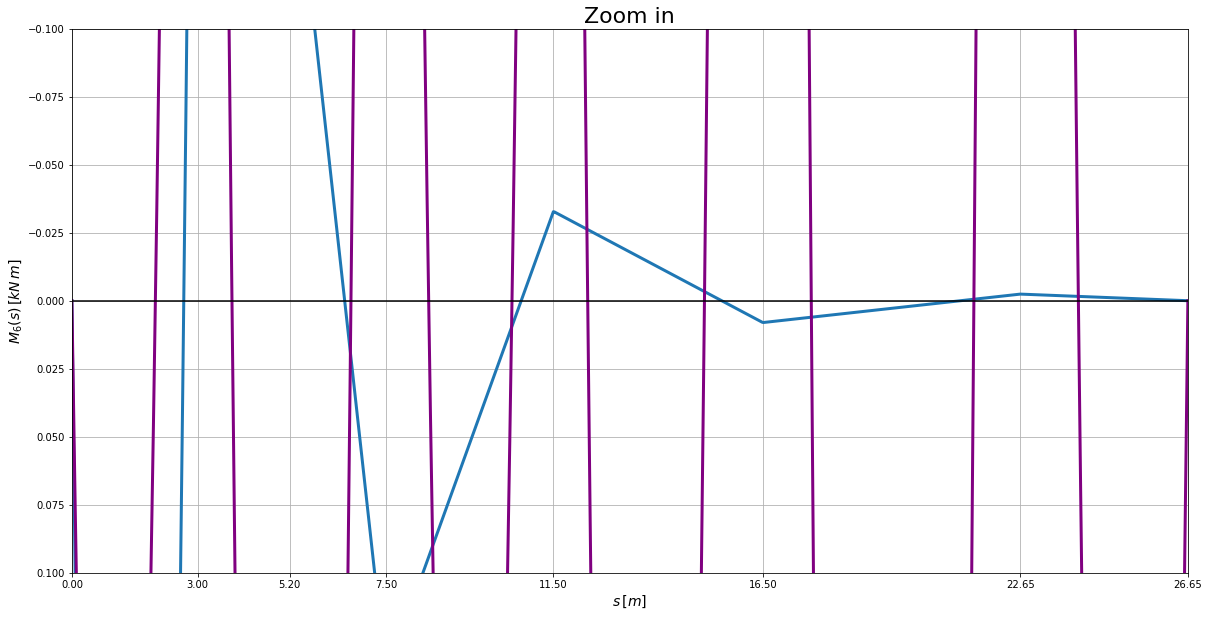

In [41]:
s = np.linspace(0,26.65, num=1000)

plt.figure(figsize=(20,10))

plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')

plt.plot(s, M1, color='blue', label=r'$M_1(s)$')
#plt.plot(s, M2, color='red', label=r'$M_2(s)$')
#plt.plot(s, M3, color='green', label=r'$M_3(s)$')
#plt.plot(s, M4, color='magenta', label=r'$M_4(s)$')
#plt.plot(s, M5, color='gray', label=r'$M_5(s)$')
#plt.plot(s, M6, color='cyan', label=r'$M_6(s)$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto tra momento flettente sulla con carico su campata 1 e momento flettente di una trave continua', fontsize='22')
plt.savefig('export/img/bendingMomentComp.jpg')



plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M1, linewidth='3')
ax3.set_xlim(0, 3) 
ax3.set_ylim(-.1, .1)
plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 5.2 ,7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoom in', fontsize='22')
plt.savefig('export/img/bendingMomentComp_zoom.jpg')
plt.show()



plt.show()

---
### CARICHI

In [42]:
Q1max_slu = 1.3*(8+11.52 + 3.75) + 1.5*(11.55+7.98 + 9.2) + 1.5*(15.01) + 1.5*.7*(7.5+14.40) + 1.5*.6*.5;
Q1min_slu = 1*(8+11.52 + 3.75) + .8*(11.55+7.98 + 9.2) -1.5*.5

Q2max_slu = 1.3*(8+6.72 + 3.75) + 1.5*(11.55+4.65 + 9.2) + 1.5*(10.30) + 1.5*.7*(7.5+8.4) + 1.5*.6*.3
Q2min_slu = 1*(8+6.72 + 3.75) + .8*(11.55+4.65 + 9.2) - 1.5*.3

Q3max_slu = 1.3*(8+3.2 + 3.75) + 1.5*(11.55+2.215 + 9.2) + 1.5*(4.17) + 1.5*.7*(7.5+4) + 1.5*.6*.138
Q3min_slu = 1*(8+3.2 + 3.75) + .8*(11.55+2.215 + 9.2) - 1.5*.138

In [43]:
Q3min_slu

33.115

---
### COMBINAZIONI

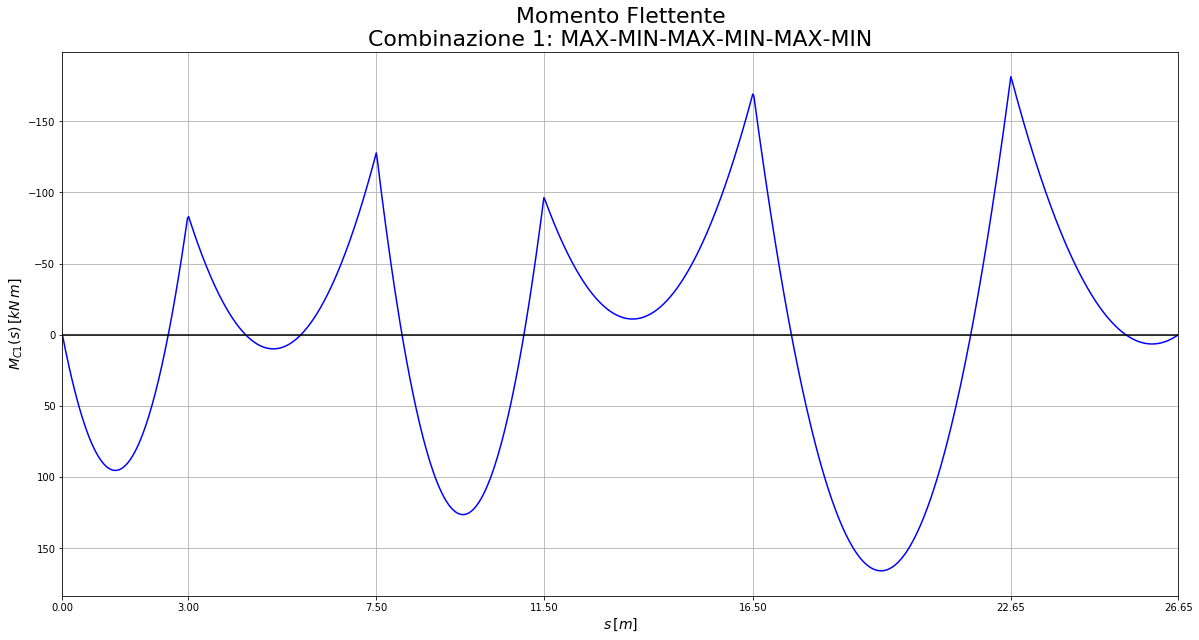

In [44]:
s = np.linspace(0,26.65, num=1000)
MC1 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C1}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Momento Flettente\nCombinazione 1: MAX-MIN-MAX-MIN-MAX-MIN', fontsize='22')
plt.savefig('export/img/bendingMomentCombo_1.jpg')
plt.show()

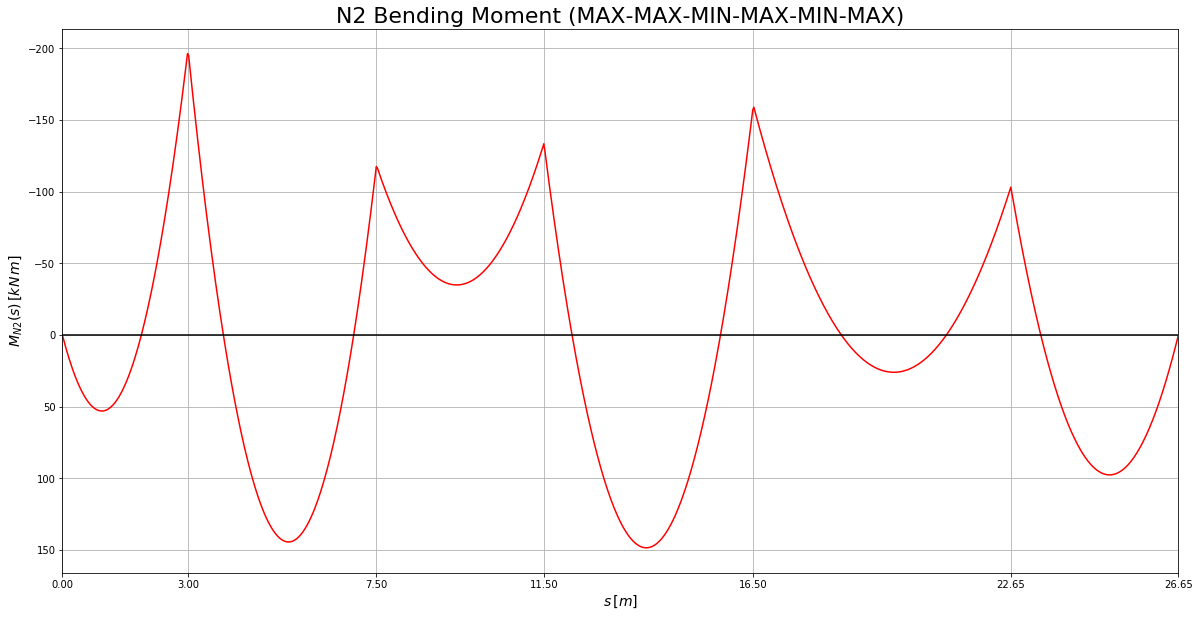

In [45]:
s = np.linspace(0,26.65, num=1000)
MN2 = M1*Q1max_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N2 Bending Moment (MAX-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()

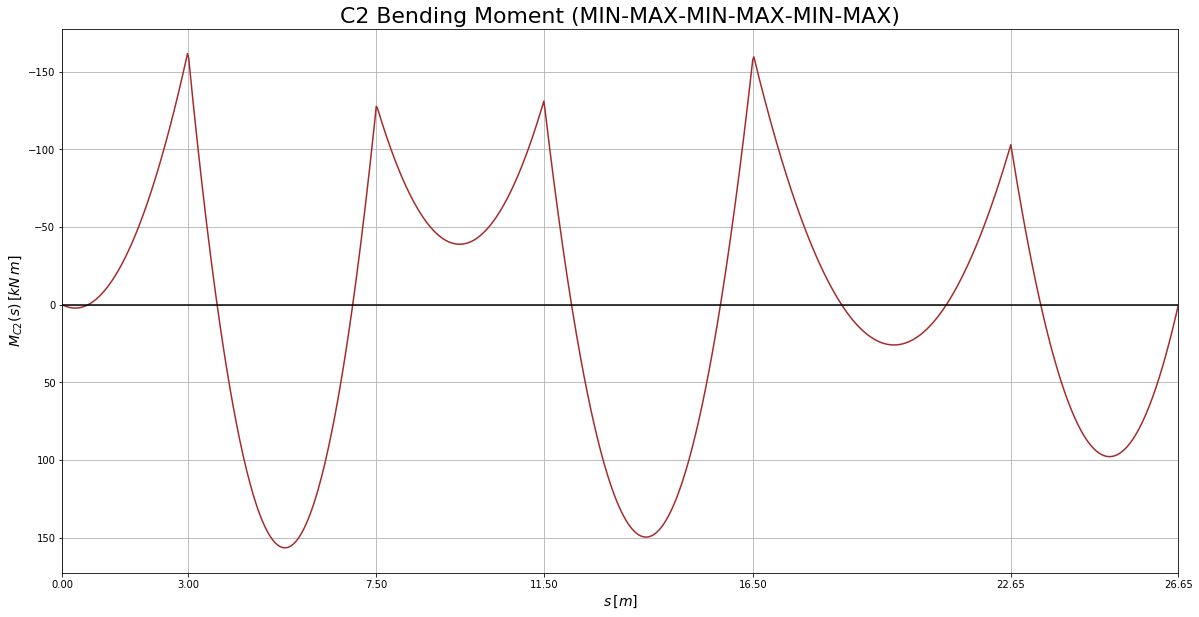

In [46]:
s = np.linspace(0,26.65, num=1000)
MC2 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC2, color='brown')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C2 Bending Moment (MIN-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()

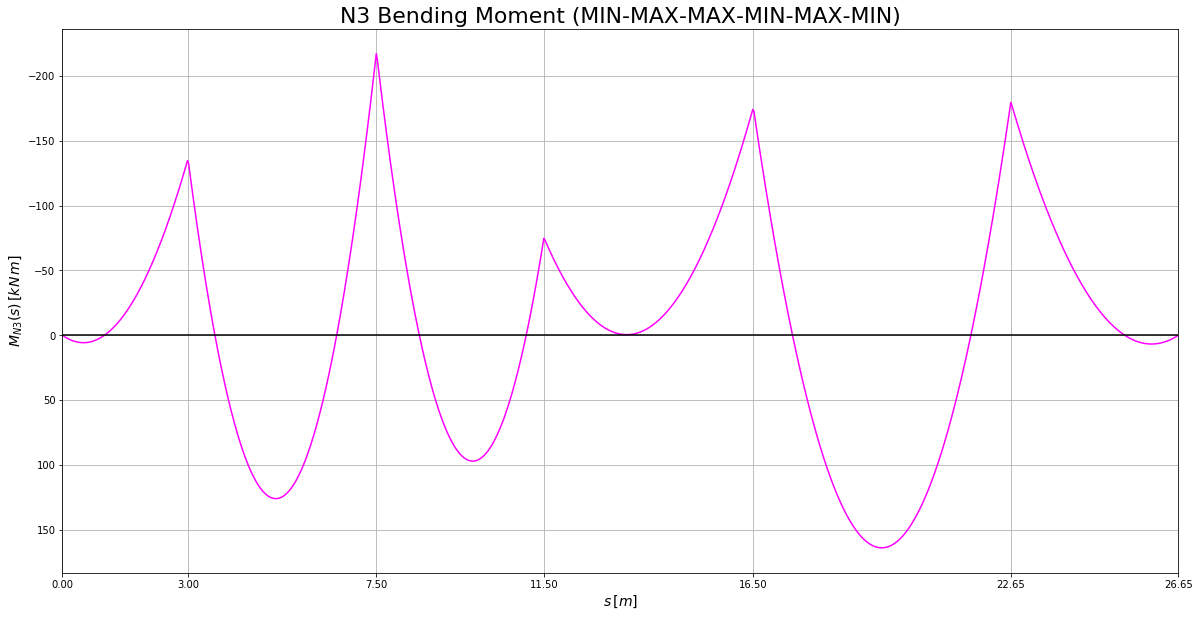

In [47]:
s = np.linspace(0,26.65, num=1000)
MN3 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN3, color='magenta')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N3}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N3 Bending Moment (MIN-MAX-MAX-MIN-MAX-MIN)', fontsize='22')
plt.show()

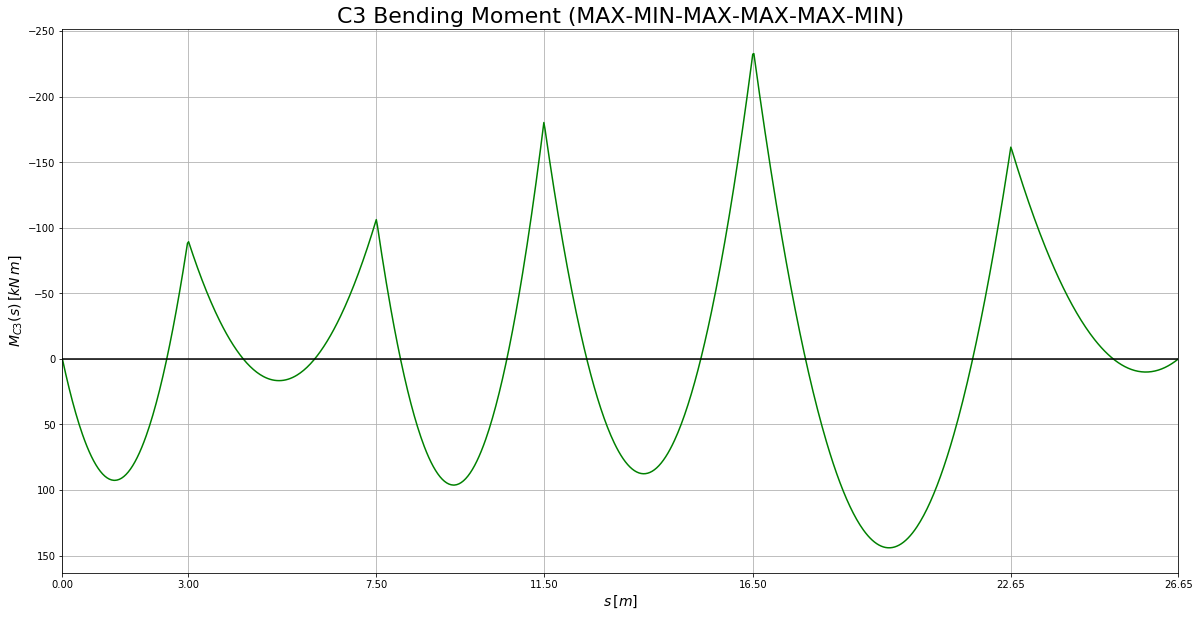

In [48]:
s = np.linspace(0,26.65, num=1000)
MC3 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2max_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC3, color='green')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C3}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C3 Bending Moment (MAX-MIN-MAX-MAX-MAX-MIN)', fontsize='22')
plt.show()

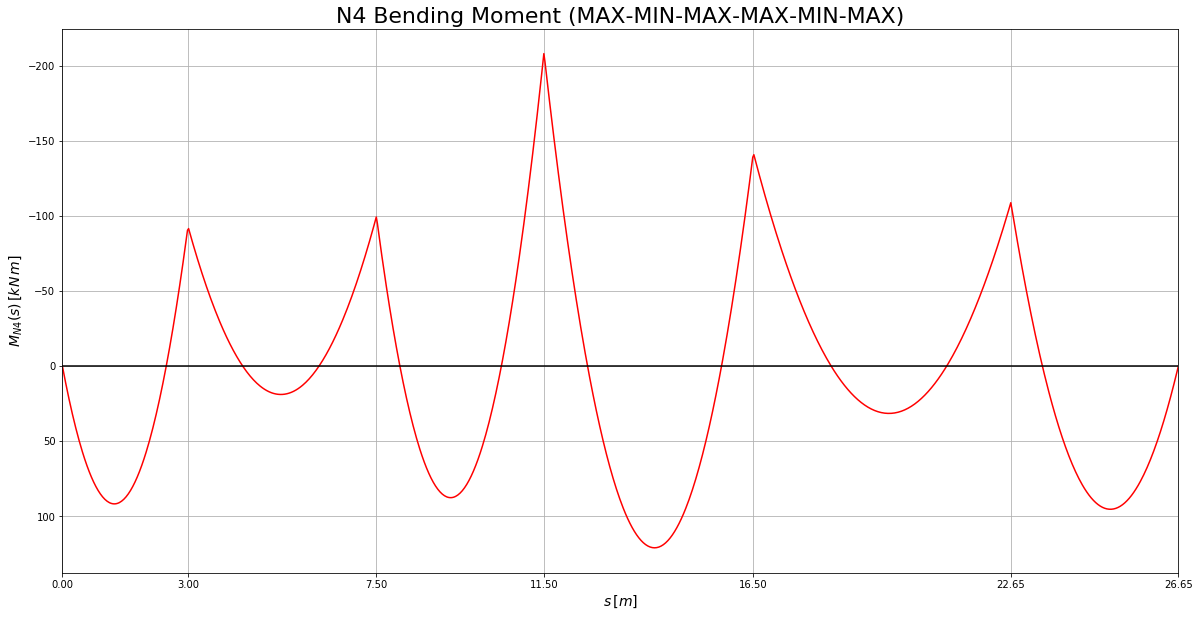

In [49]:
s = np.linspace(0,26.65, num=1000)
MN4 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN4, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N4}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N4 Bending Moment (MAX-MIN-MAX-MAX-MIN-MAX)', fontsize='22')
plt.show()

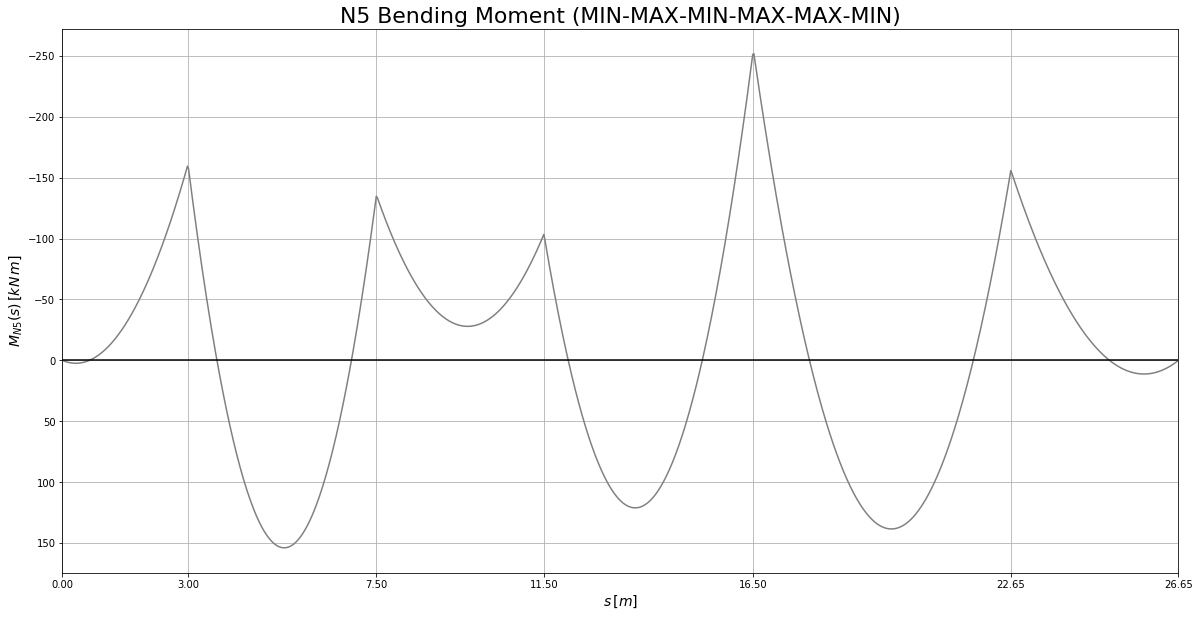

In [50]:
s = np.linspace(0,26.65, num=1000)
MN5 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN5, color='gray')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N5}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N5 Bending Moment (MIN-MAX-MIN-MAX-MAX-MIN)', fontsize='22')
plt.show()

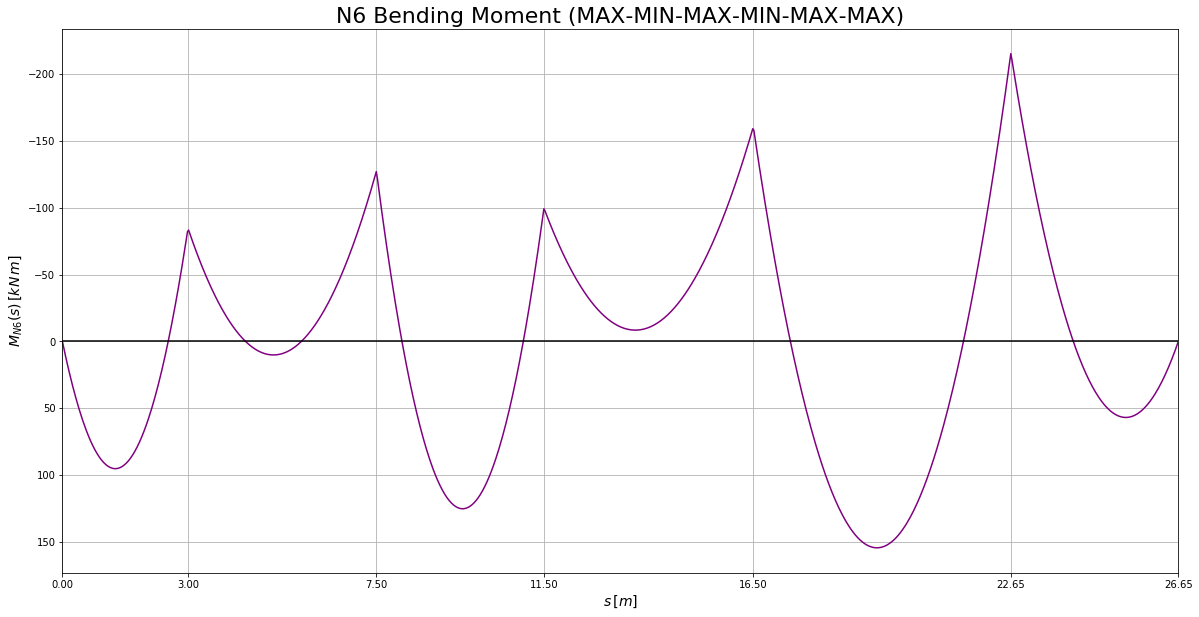

In [51]:
s = np.linspace(0,26.65, num=1000)
MN6 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN6, color='purple')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N6}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N6 Bending Moment (MAX-MIN-MAX-MIN-MAX-MAX)', fontsize='22')
plt.show()

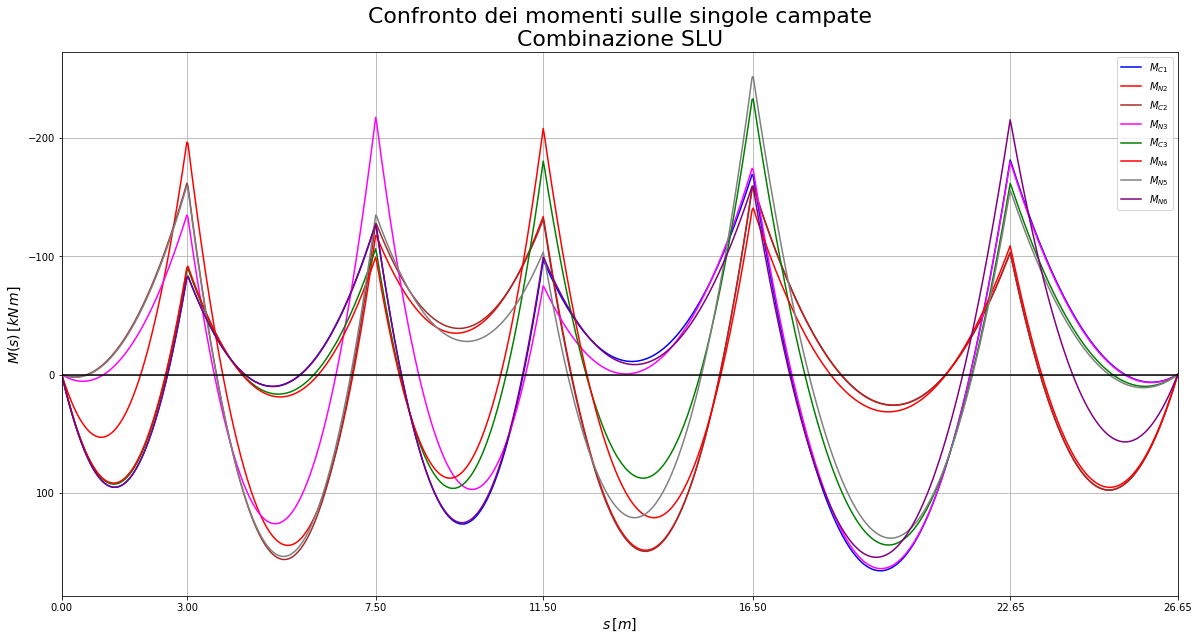

In [52]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2, color='brown', label=r'$M_{C2}$')
plt.plot(s, MN3, color='magenta', label=r'$M_{N3}$')
plt.plot(s, MC3, color='green' , label=r'$M_{C3}$')
plt.plot(s, MN4, color='red', label=r'$M_{N4}$')
plt.plot(s, MN5, color='gray', label=r'$M_{N5}$')
plt.plot(s, MN6, color='purple', label=r'$M_{N6}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei momenti sulle singole campate\nCombinazione SLU', fontsize='22')
plt.savefig('export/img/bendingMomentComparison_slu.jpg')
plt.show()

In [53]:
def smax(MCimax):
    '''Input max value of bending moment on span i. Return s coordinate of max value '''
    imax = np.where(Mmax == MCimax)
    if s[imax][0] != 0:
        return s[imax][0]
    elif s[imax][0] == 0:
        return 'NaN'

def smin(MCimin):
    imin = np.where(Mmin == MCimin)
    if s[imin][0] != 0:
        return s[imin][0]
    elif s[imin][0] == 0:
        return 'NaN'

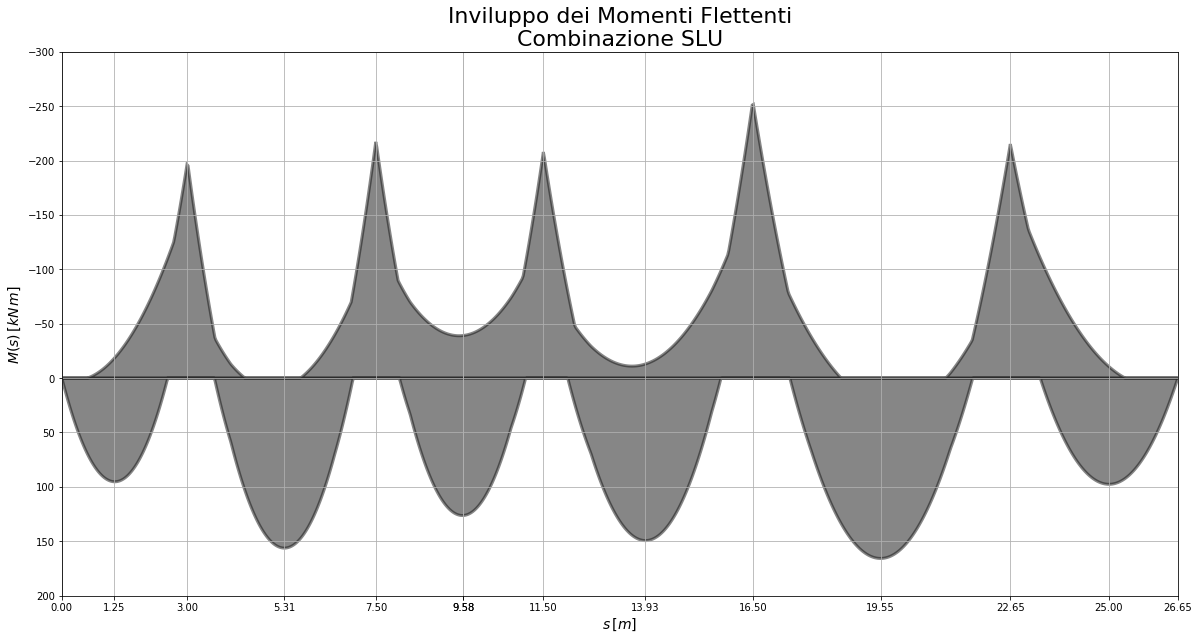

In [54]:
Mmax = np.zeros(1000)
Mmin = np.zeros(1000)

for i in range (0, 999):
    Mmax[i] = max(MC1[i], MN2[i], MC2[i], MN3[i], MC3[i], MN4[i], MN5[i], MN6[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1[i], MN2[i], MC2[i], MN3[i], MC3[i], MN4[i], MN5[i], MN6[i])
    if Mmin[i] > 0:
        Mmin[i]=0

        
#-------------------------------------
        
MC1max = max(Mmax[0:112])
MN2min = min(Mmin[0:224])
MC2max = max(Mmax[112:281])
MC2min = max(Mmin[112:281])
MN3min = min(Mmin[250:374])
MC3max = max(Mmax[281:431])
MC3min = max(Mmin[281:431])
MN4min = min(Mmin[374:500])
MC4max = max(Mmax[431:618])
MC4min = max(Mmin[431:618])
MN5min = min(Mmin[500:650])
MC5max = max(Mmax[618:849])
MC5min = max(Mmin[618:849])
MN6min = min(Mmin[650::])
MC6max = max(Mmax[849::])

#-----------------------------------

sC1max = smax(MC1max)
sN2min = smin(MN2min)
sC2max = smax(MC2max)
sC2min = smin(MC2min)
sN3min = smin(MN3min)
sC3max = smax(MC3max)
sC3min = smin(MC3min)
sN4min = smin(MN4min)
sC4max = smax(MC4max)
sC4min = smin(MC4min)
sN5min = smin(MN5min)
sC5max = smax(MC5max)
sC5min = smin(MC5min)
sN6min = smin(MN6min)
sC6max = smax(MC6max)

#--------------------------------------

def bendingMomentPlot():
    plt.figure(figsize=(20,10))
    plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
    plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
    plt.xlim(s.min(), s.max())
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(r'$s\,[m]$', fontsize='14')
    plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
    plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
    round(sC1max, 2), round(sC2max, 2), round(sC3max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 2), round(sC6max, 2)])
    plt.yticks(np.arange(-300, 250, step=50))
    plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLU', fontsize='22')
    plt.savefig('export/img/bendingMomentEnvelope_slu.jpg')
    return plt.show()

bendingMomentPlot()

In [55]:
MEd_slu = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'smax [m]', 'MEd- [kN m]', 'smin [m]'],
    ['C1', MC1max, round(sC1max, 2), 'NaN', 'NaN'],
    ['N2', 'NaN', 'NaN', MN2min, round(sN2min)], 
    ['C2', MC2max, round(sC2max, 2), MC2min, sC2min],
    ['N3', 'NaN', 'NaN', MN3min, round(sN3min, 2)], 
    ['C3', MC3max, round(sC3max, 2), MC3min, round(sC3min, 2)],
    ['N4', 'NaN', 'NaN', MN4min, round(sN4min, 1)], 
    ['C4', MC4max, round(sC4max, 2), MC4min, round(sC4min, 2)],
    ['N5', 'NaN', 'NaN', MN5min, round(sN5min, 1)], 
    ['C5', MC5max, round(sC5max, 2), MC5min, sC5min],
    ['N6', 'NaN', 'NaN', MN6min, round(sN6min, 2)], 
    ['C6', MC6max, round(sC6max), 'NaN', 'NaN']
])
MEd_slu.columns = MEd_slu.iloc[0]
MEd_slu = MEd_slu.drop([0])
MEd_slu = MEd_slu.set_index('Section')
MEd_slu.to_latex('export/tab/bendingMoment_slu.tex')
MEd_slu

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,95.3533,1.25,NaN,NaN
N2,NaN,NaN,-196.35,3
C2,156.371,5.31,0,NaN
N3,NaN,NaN,-217.324,7.5
C3,126.402,9.58,-38.9462,9.5
N4,NaN,NaN,-207.946,11.5
C4,149.47,13.93,-11.0069,13.61
N5,NaN,NaN,-251.747,16.5
C5,165.908,19.55,0,NaN


---
## SHEAR

---
#### Load on Span 1

In [56]:
T1 = (R1[0] - 1 * s) * (Hv(s) - Hv(s-3)) + R1[1] * (Hv(s-3) - Hv(s-(3+4.5))) + R1[2]*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R1[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R1[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R1[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

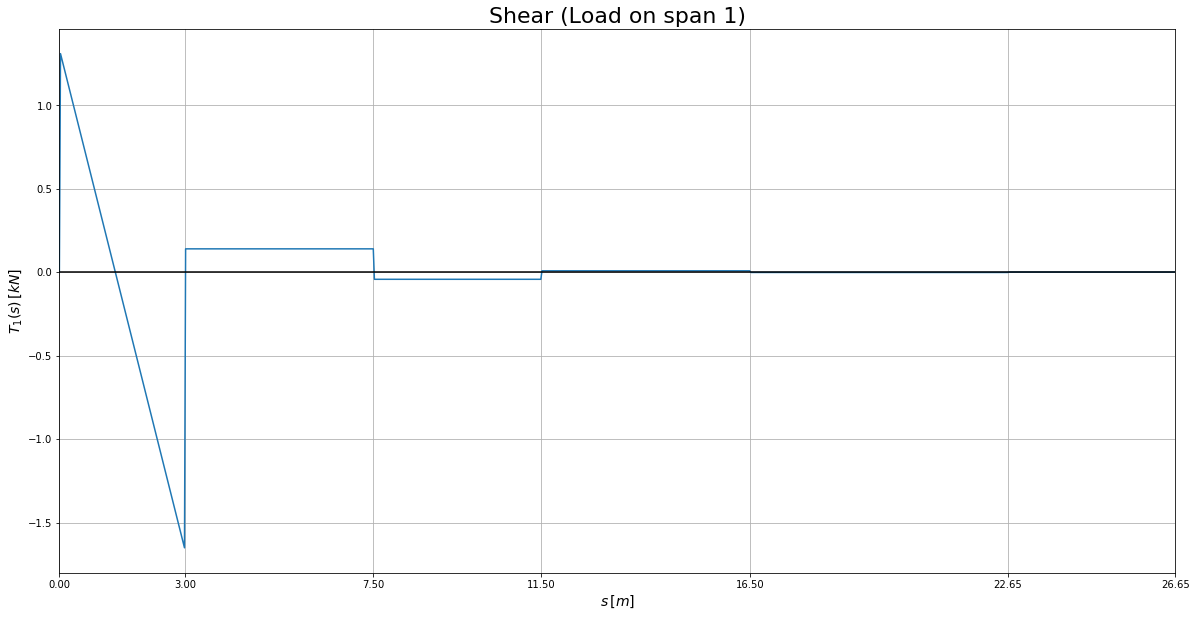

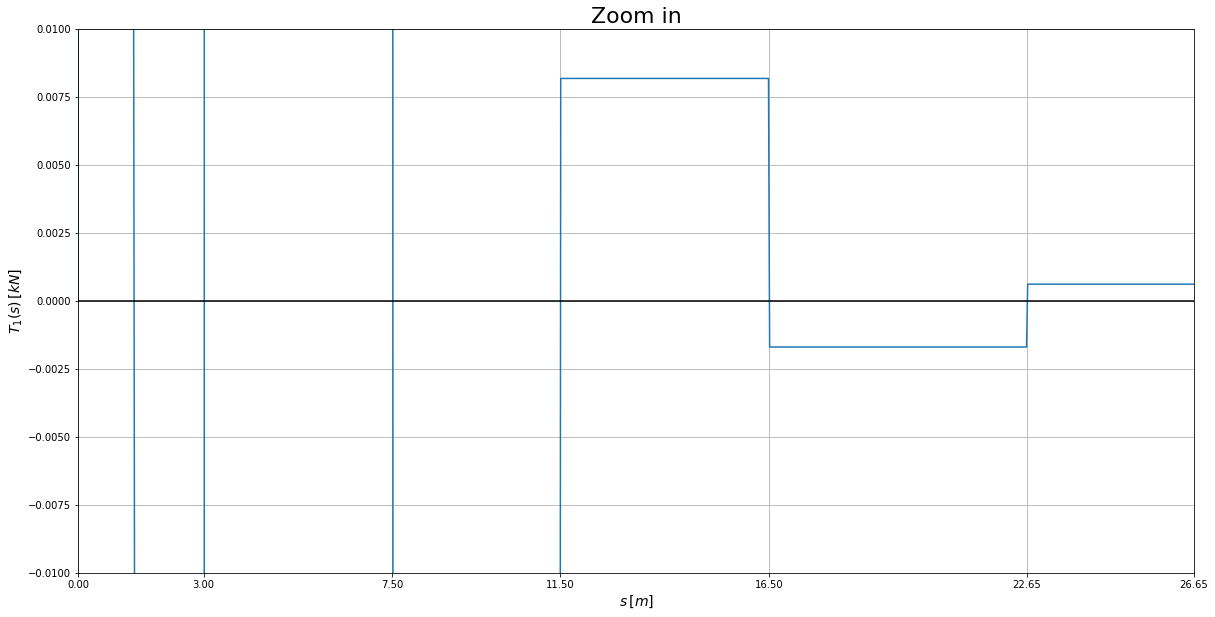

In [57]:
plt.figure(figsize=(20,10))
plt.plot(s, T1, )
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_1(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 1)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, T1, )
plt.xlim(s.min(), s.max())
plt.ylim(-.01, .01)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_1(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 2

In [58]:
T2 = R2[0] * (Hv(s) - Hv(s-3)) + (R2[1] - 1*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + R2[2]*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R2[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R2[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R2[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

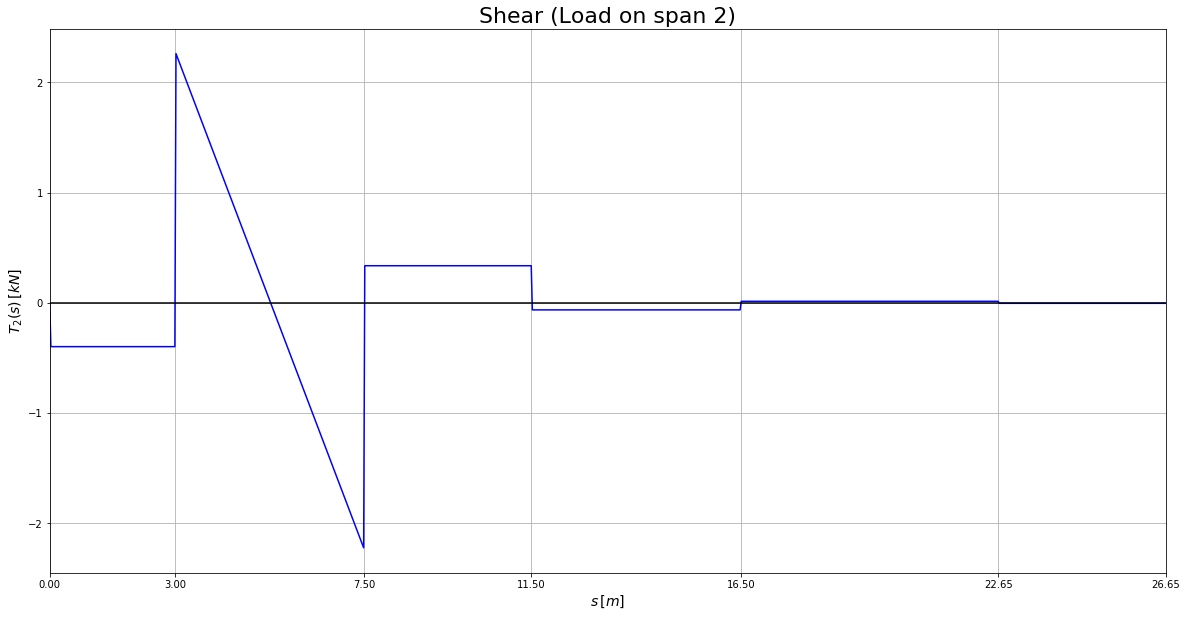

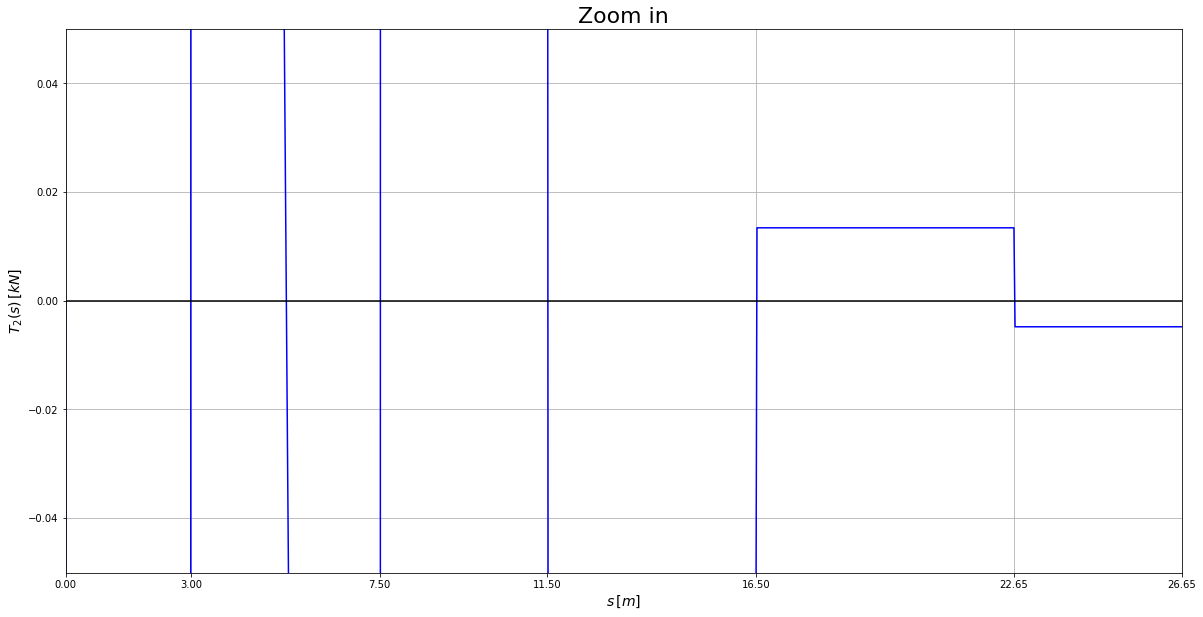

In [59]:
plt.figure(figsize=(20,10))
plt.plot(s, T2, 'b')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_2(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 2)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, T2, 'b')
plt.xlim(s.min(), s.max())
plt.ylim(-.05, .05)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_2(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 3

In [60]:
T3 = R3[0] * (Hv(s) - Hv(s-3)) + (R3[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R3[2] - 1*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ R3[3]*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R3[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R3[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

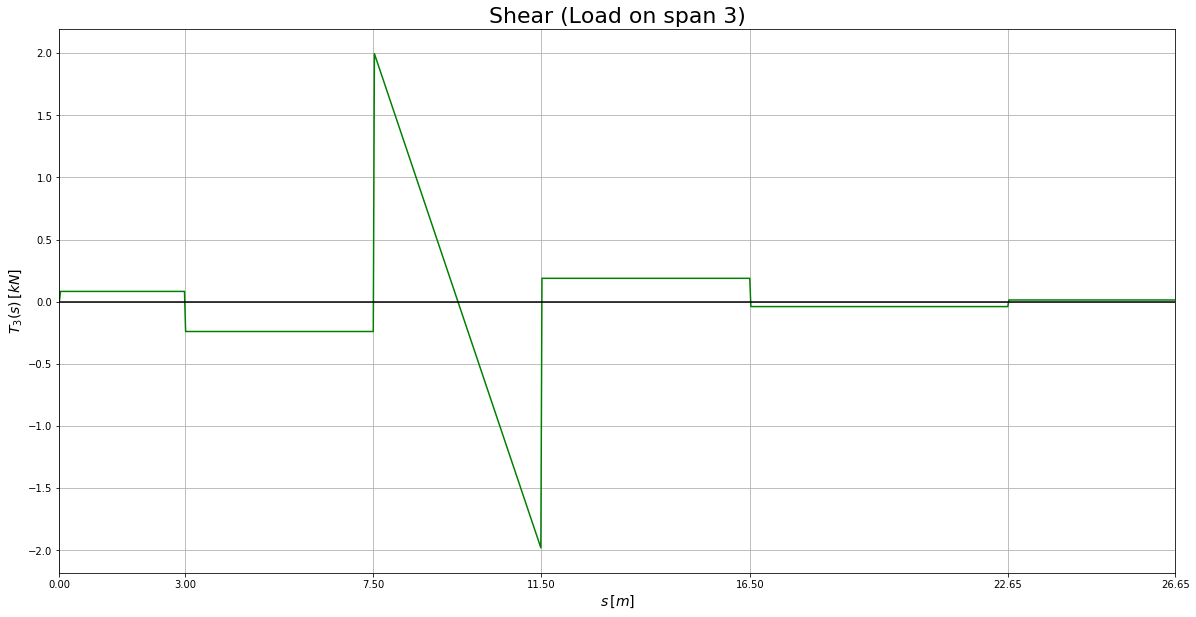

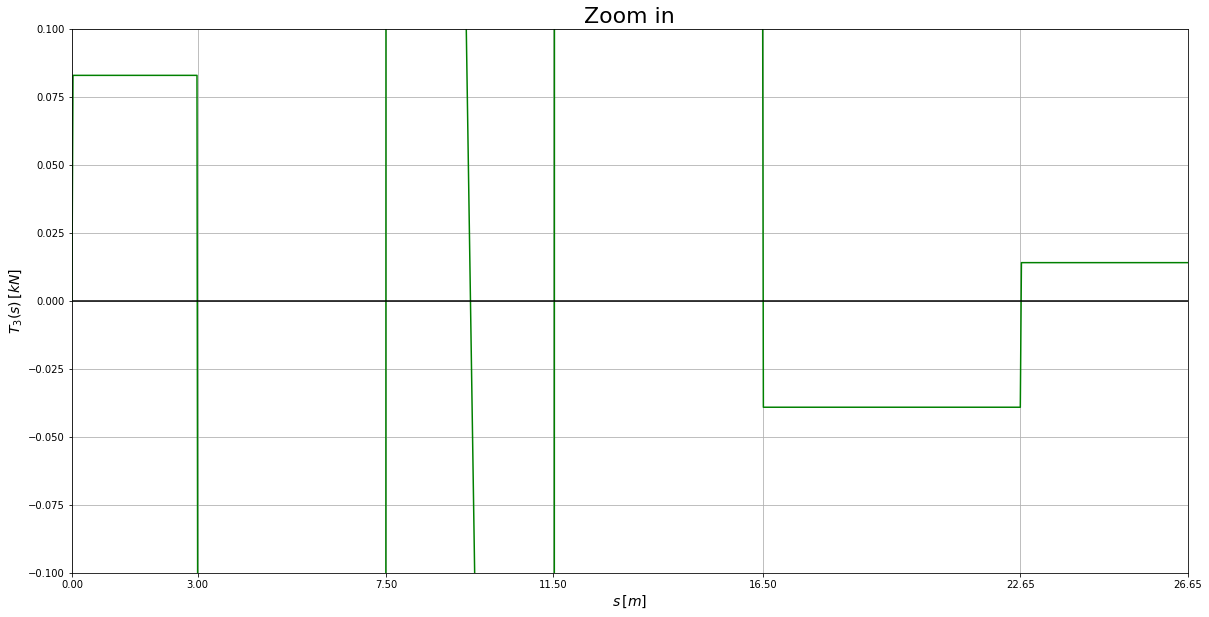

In [61]:
plt.figure(figsize=(20,10))
plt.plot(s, T3, 'g')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_3(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 3)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, T3, 'g')
plt.xlim(s.min(), s.max())
plt.ylim(-.1, .1)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_3(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

---
#### Load on Span 4

In [62]:
T4 = R4[0] * (Hv(s) - Hv(s-3)) + (R4[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R4[2] - 0*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ (R4[3] - 1*(s-(3+4.5+4)))*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ R4[4]*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R4[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

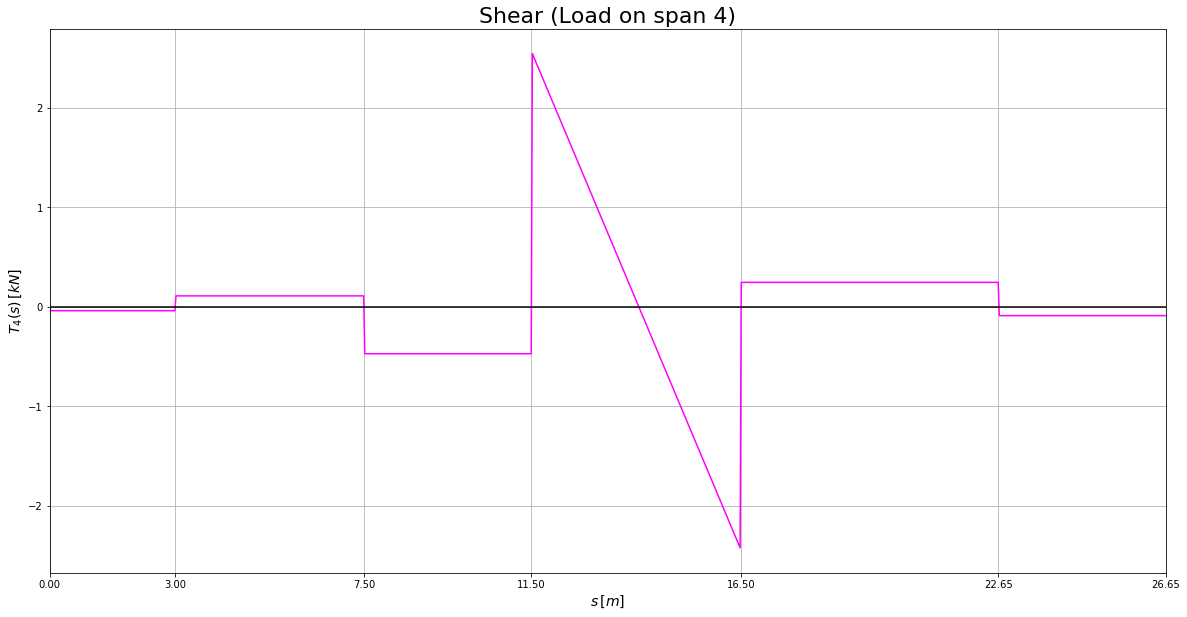

In [63]:
plt.figure(figsize=(20,10))
plt.plot(s, T4, 'magenta')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_4(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 4)', fontsize='22')
plt.show()


---
#### Load on Span 5

In [64]:
T5 = R5[0] * (Hv(s) - Hv(s-3)) + (R5[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R5[2] - 0*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ (R5[3] - 0*(s-(3+4.5+4)))*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ (R5[4] - 1*(s-(3+4.5+4+5)))*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  R5[5]*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

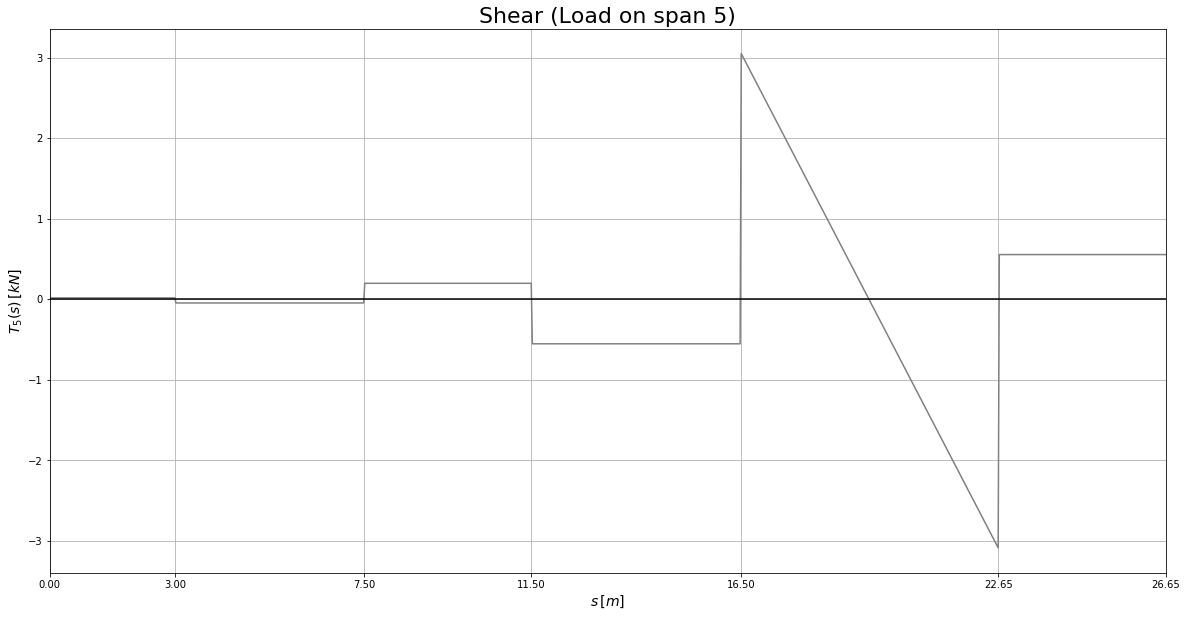

In [65]:
plt.figure(figsize=(20,10))
plt.plot(s, T5, 'gray')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_5(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 5)', fontsize='22')
plt.show()

---
#### Load on Span 6

In [66]:
T6 = R6[0] * (Hv(s) - Hv(s-3)) + (R6[1] - 0*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (R6[2] - 0*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4)))+ (R6[3] - 0*(s-(3+4.5+4)))*(Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5)))+ (R6[4] - 0*(s-(3+4.5+4+5)))*(Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) +  (R6[5] - 1*(s-(3+4.5+4+5+6.15)))*(Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

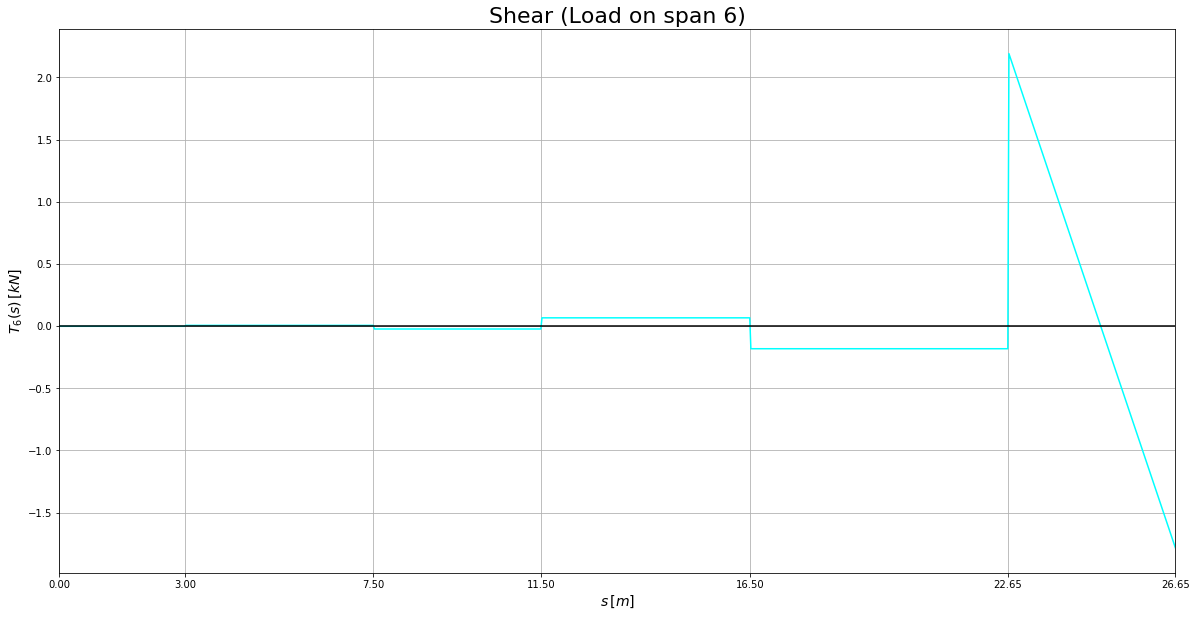

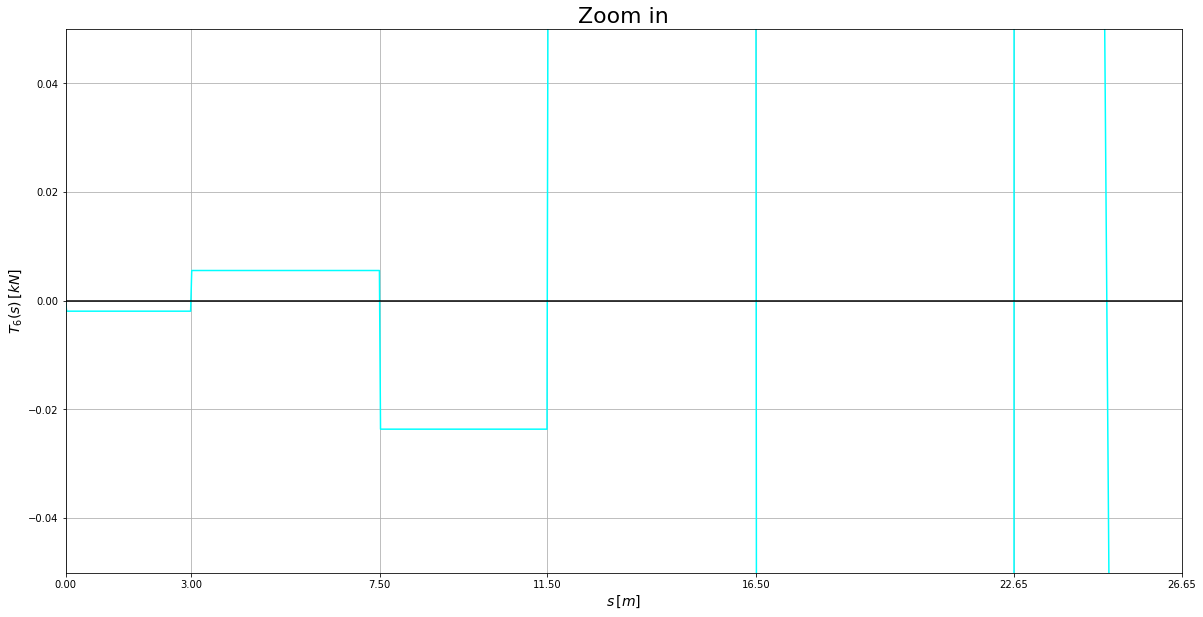

In [67]:
plt.figure(figsize=(20,10))
plt.plot(s, T6, 'cyan')
plt.xlim(s.min(), s.max())
#plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_6(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear (Load on span 6)', fontsize='22')
plt.show()

#-----------ZOOM IN----------------
plt.figure(figsize=(20,10))
plt.plot(s, T6, 'cyan')
plt.xlim(s.min(), s.max())
plt.ylim(-.05, .05)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T_6(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.grid()
plt.axhline(0, color='black')
plt.title('Zoom in', fontsize='22')
plt.show()

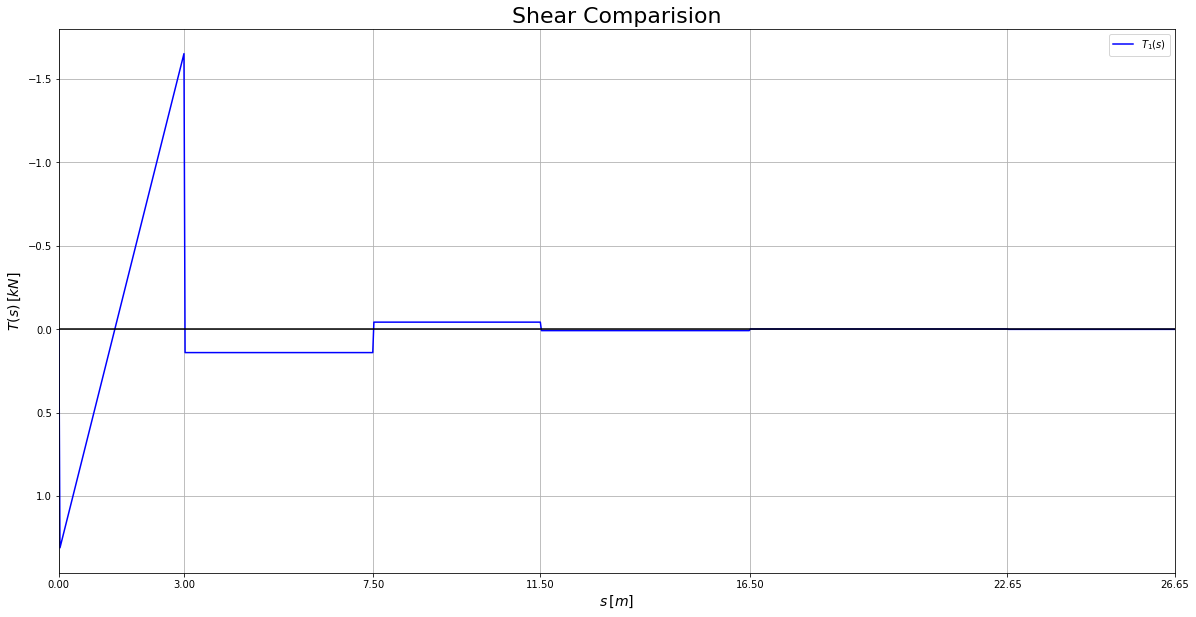

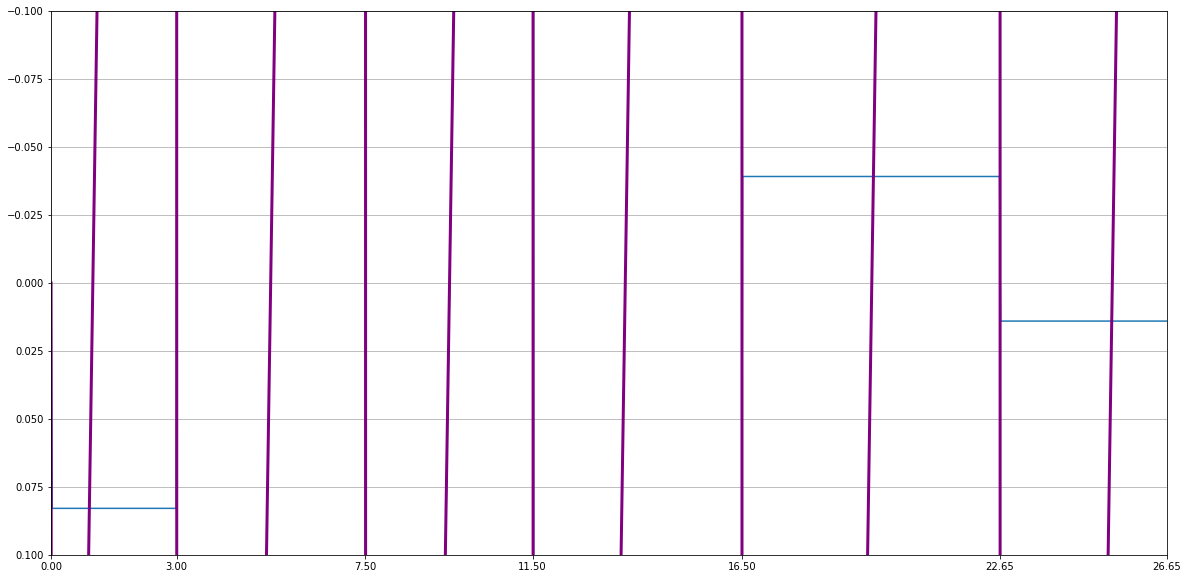

In [68]:
s = np.linspace(0,26.65, num=1000)

plt.figure(figsize=(20,10))

#plt.plot(s, T1+T2+T3+T4+T5+T6, color='purple', linewidth='3')

plt.plot(s, T1, color='blue', label=r'$T_1(s)$')
#plt.plot(s, T2, color='red', label=r'$T_2(s)$')
#plt.plot(s, T3, color='green', label=r'$T_3(s)$')
#plt.plot(s, T4, color='magenta', label=r'$T_4(s)$')
#plt.plot(s, T5, color='gray', label=r'$T_5(s)$')
#plt.plot(s, T6, color='cyan', label=r'$T_6(s)$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T(s)\,[kN]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Shear Comparision', fontsize='22')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(s, T3)
plt.plot(s, T1+T2+T3+T4+T5+T6, color='purple', linewidth='3')
plt.xlim(s.min(), s.max())
plt.ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.show()


---
### COMBINAZIONI

TN1max =  147.6616563655386 kN 

TN2min =  -243.94800979737548 kN 

TN2max =  284.6799970111256 kN 

TN3min =  -286.2638914823283 kN 

TN3max =  271.68893255084754 kN 

TN4min =  -265.57529314700685 kN 

TN4max =  247.3228599109953 kN 

TN5min =  -265.24787689122275 kN 

TN5max =  237.55135023595201 kN 

TN6min =  -231.27681085068184 kN 

TN6max =  196.75053263301567 kN 

TN7min =  -116.96478024623656 kN 



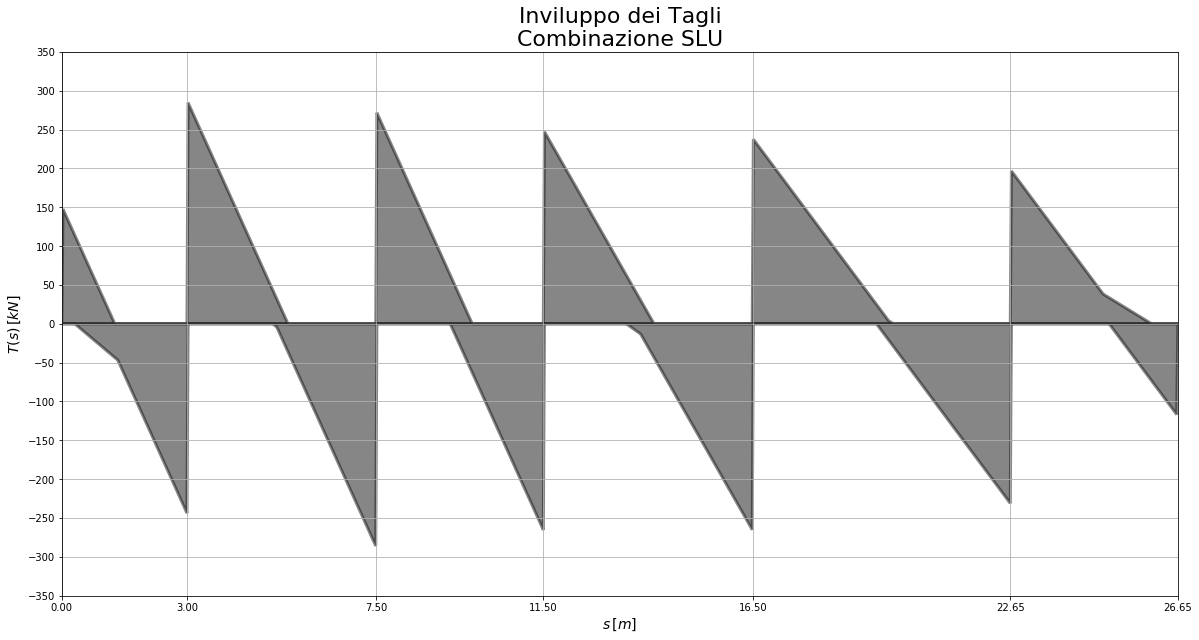

In [69]:
TN1 = T1*Q1max_slu + T2*Q1min_slu + T3*Q1max_slu + T4*Q2min_slu + T5*Q3max_slu + T6*Q3min_slu
TN2 = T1*Q1max_slu + T2*Q1max_slu + T3*Q1min_slu + T4*Q2max_slu + T5*Q3min_slu + T6*Q3max_slu
TN3 = T1*Q1min_slu + T2*Q1max_slu + T3*Q1max_slu + T4*Q2min_slu + T5*Q3max_slu + T6*Q3min_slu
TN4 = T1*Q1max_slu + T2*Q1min_slu + T3*Q1max_slu + T4*Q2max_slu + T5*Q3min_slu + T6*Q3max_slu
TN5 = T1*Q1min_slu + T2*Q1max_slu + T3*Q1min_slu + T4*Q2max_slu + T5*Q3max_slu + T6*Q3min_slu
TN6 = T1*Q1max_slu + T2*Q1min_slu + T3*Q1max_slu + T4*Q2min_slu + T5*Q3max_slu + T6*Q3max_slu
TN7 = T1*Q1min_slu + T2*Q1max_slu + T3*Q1min_slu + T4*Q2max_slu + T5*Q3min_slu + T6*Q3max_slu

#--------------------------------------------------------------------------------------------------

Tmax = np.zeros(1000)
Tmin = np.zeros(1000)
for i in range (0, 999):
    Tmax[i] = max(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmax[i] < 0:
        Tmax[i]=0
    Tmin[i] = min(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmin[i] > 0:
        Tmin[i]=0

#-------------------------------------------------------------------------------

TN1max = Tmax[1]
print('TN1max = ', TN1max, 'kN', '\n')

TN2min = min(Tmin[0:225])
print('TN2min = ', TN2min, 'kN', '\n')

TN2max = max(Tmax[112:225])
print('TN2max = ', TN2max, 'kN', '\n')

TN3min = min(Tmin[250:285])
print('TN3min = ', TN3min, 'kN', '\n')

TN3max = max(Tmax[250:285])
print('TN3max = ', TN3max, 'kN', '\n')

TN4min = min(Tmin[290:435])
print('TN4min = ', TN4min, 'kN', '\n')

TN4max = max(Tmax[290:435])
print('TN4max = ', TN4max, 'kN', '\n')

TN5min = min(Tmin[450:620])
print('TN5min = ', TN5min, 'kN', '\n')

TN5max = max(Tmax[450:620])
print('TN5max = ', TN5max, 'kN', '\n')

TN6min = min(Tmin[650:860])
print('TN6min = ', TN6min, 'kN', '\n')

TN6max = max(Tmax[650:860])
print('TN6max = ', TN6max, 'kN', '\n')

TN7min = min(Tmin[900::])
print('TN7min = ', TN7min, 'kN', '\n')

#-------------------------------------------------------------------------------

def shearPlot():
    plt.figure(figsize=(20,10))
    plt.fill(s, Tmax, linewidth='3', color='#0f0f0f80')
    plt.fill(s, Tmin, linewidth='3', color='#0f0f0f80')
    plt.xlim(s.min(), s.max())
    plt.grid()
    plt.xlabel(r'$s\,[m]$', fontsize='14')
    plt.ylabel(r'$T(s)\,[kN]$', fontsize='14')
    plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
    plt.yticks(np.arange(-350, 400, step=50))
    plt.title('Inviluppo dei Tagli\nCombinazione SLU', fontsize='22')
    plt.savefig('export/img/shearEnvelope_slu.jpg')
    return plt.show()

shearPlot()

In [70]:
TN1max = Tmax[1]
TN2min = min(Tmin[0:225])
TN2max = max(Tmax[112:225])
TN3min = min(Tmin[250:285])
TN3max = max(Tmax[250:285])
TN4min = min(Tmin[290:435])
TN4max = max(Tmax[290:435])
TN5min = min(Tmin[450:620])
TN5max = max(Tmax[450:620])
TN6min = min(Tmin[650:860])
TN6max = max(Tmax[650:860])
TN7min = min(Tmin[900::])

TEd = pd.DataFrame([
    ['Section','TEd+ [kN]', 'smax [m]', 'TEd- [kN]', 'smin [m]'],
    ['N1', TN1max, 0, 0, 0],
    ['N2', TN2max, 3, TN2min, 3], 
    ['N3', TN3max, 7.5, TN3min, 7.5], 
    ['N4', TN4max, 11.5, TN4min, 11.5], 
    ['N5', TN5max, 16.5, TN5min, 16.5], 
    ['N6', TN6max, 22.65, TN6min, 22.65], 
    ['N7', 0, 26.65, TN7min, 26.65]
])
TEd.columns = TEd.iloc[0]
TEd = TEd.drop([0])
TEd = TEd.set_index('Section')
TEd.to_latex('export/tab/shear_slu.tex')
TEd

,TEd+ [kN],smax [m],TEd- [kN],smin [m]
Section,,,,
N1,147.662,0,0,0
N2,284.68,3,-243.948,3
N3,271.689,7.5,-286.264,7.5
N4,247.323,11.5,-265.575,11.5
N5,237.551,16.5,-265.248,16.5
N6,196.751,22.65,-231.277,22.65
N7,0,26.65,-116.965,26.65


---
# SLE 
---

## SLE RARA

### BENDING MOMENT

In [71]:
Q1max_sle_rara = 8+11.52+3.75 + 11.55+7.98+9.2 + 15.01 + .7*(7.5+14.4) + .6*.5
Q2max_sle_rara = 8+6.72+3.75 + 11.55+4.65+9.20 + 10.30 + .7*(7.5+8.4) + .6*.3
Q3max_sle_rara = 8+3.2+3.75 + 11.55+2.215+9.20 + 4.17 + .7*(7.5+4) + .6*.138

#------------------------------------------------------------------------------------

Q1min_sle_rara = 8+11.52+3.75 + 11.55+7.98+9.2 + .5*8.6 + .7*(14.4) + .6*.5 + 7.5
Q2min_sle_rara = 8+6.72+3.75 + 11.55+4.65+9.20 + .5*5.06 + .7*(8.4) + .6*.3+7.
Q3min_sle_rara = 8+3.2+3.75 + 11.55+2.215+9.20 +.5* 2.41 + .7*(7.5) + .6*.138+4

In [72]:
s = np.linspace(0,26.65, num=1000)
MC1_sle_rara = M1*Q1max_sle_rara + M2*Q1min_sle_rara + M3*Q1max_sle_rara + M4*Q2min_sle_rara + M5*Q3max_sle_rara + M6*Q3min_sle_rara
MN2_sle_rara = M1*Q1max_sle_rara + M2*Q1max_sle_rara + M3*Q1min_sle_rara + M4*Q2max_sle_rara + M5*Q3min_sle_rara + M6*Q3max_sle_rara
MC2_sle_rara = M1*Q1min_sle_rara + M2*Q1max_sle_rara + M3*Q1min_sle_rara + M4*Q2max_sle_rara + M5*Q3min_sle_rara + M6*Q3max_sle_rara
MN3_sle_rara = M1*Q1min_sle_rara + M2*Q1max_sle_rara + M3*Q1max_sle_rara + M4*Q2min_sle_rara + M5*Q3max_sle_rara + M6*Q3min_sle_rara
MC3_sle_rara = M1*Q1max_sle_rara + M2*Q1min_sle_rara + M3*Q1max_sle_rara + M4*Q2max_sle_rara + M5*Q3max_sle_rara + M6*Q3min_sle_rara
MN4_sle_rara = M1*Q1max_sle_rara + M2*Q1min_sle_rara + M3*Q1max_sle_rara + M4*Q2max_sle_rara + M5*Q3min_sle_rara + M6*Q3max_sle_rara
MN5_sle_rara = M1*Q1min_sle_rara+ M2*Q1max_sle_rara + M3*Q1min_sle_rara + M4*Q2max_sle_rara + M5*Q3max_sle_rara + M6*Q3min_sle_rara
MN6_sle_rara = M1*Q1max_sle_rara + M2*Q1min_sle_rara + M3*Q1max_sle_rara + M4*Q2min_sle_rara + M5*Q3max_sle_rara + M6*Q3max_sle_rara

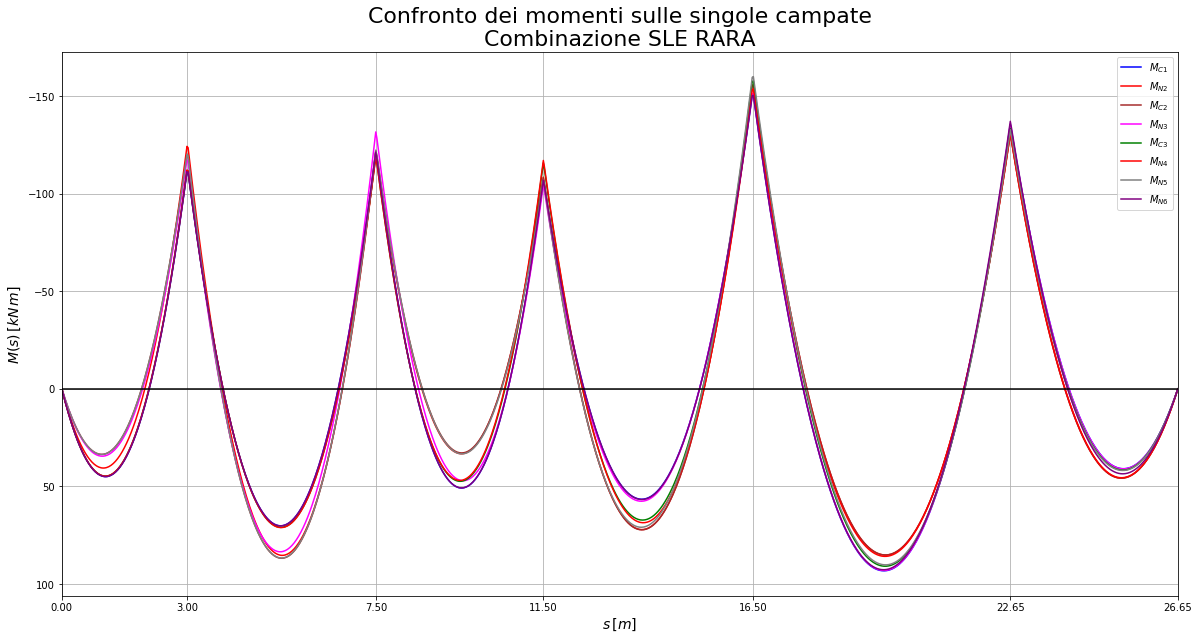

In [73]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1_sle_rara, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2_sle_rara, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2_sle_rara, color='brown', label=r'$M_{C2}$')
plt.plot(s, MN3_sle_rara, color='magenta', label=r'$M_{N3}$')
plt.plot(s, MC3_sle_rara, color='green' , label=r'$M_{C3}$')
plt.plot(s, MN4_sle_rara, color='red', label=r'$M_{N4}$')
plt.plot(s, MN5_sle_rara, color='gray', label=r'$M_{N5}$')
plt.plot(s, MN6_sle_rara, color='purple', label=r'$M_{N6}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei momenti sulle singole campate\nCombinazione SLE RARA', fontsize='22')
plt.savefig('export/img/bendingMomentComparison_sleRara.jpg')
plt.show()

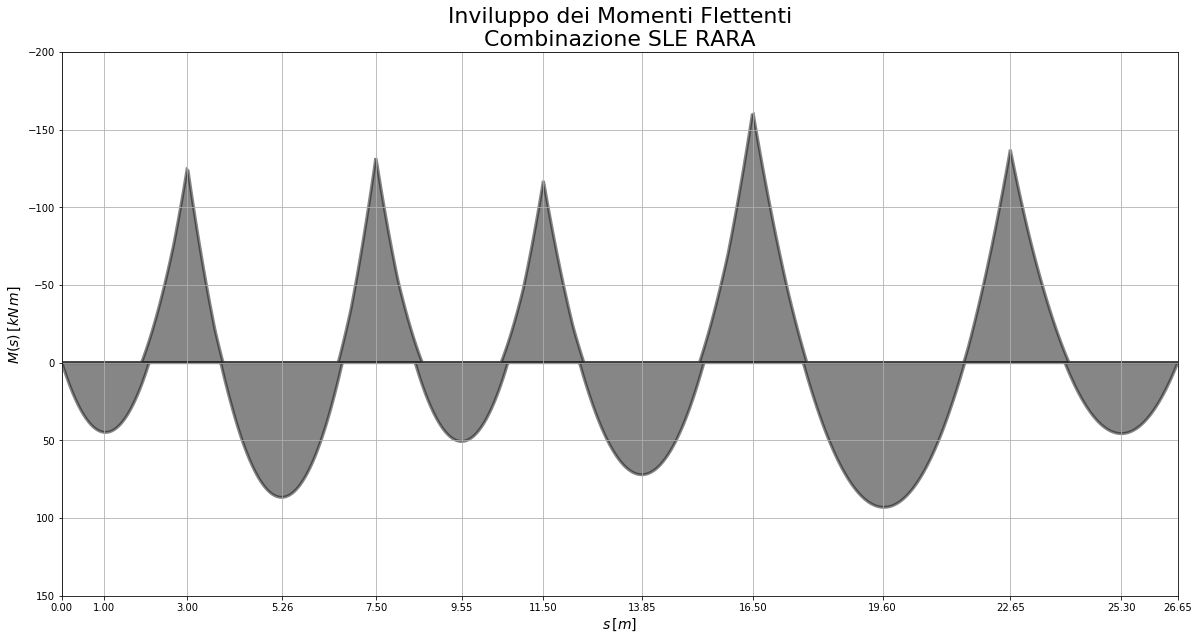

In [74]:
for i in range (0, 999):
    Mmax[i] = max(MC1_sle_rara[i], MN2_sle_rara[i], MC2_sle_rara[i], MN3_sle_rara[i], MC3_sle_rara[i], MN4_sle_rara[i], MN5_sle_rara[i], MN6_sle_rara[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1_sle_rara[i], MN2_sle_rara[i], MC2_sle_rara[i], MN3_sle_rara[i], MC3_sle_rara[i], MN4_sle_rara[i], MN5_sle_rara[i], MN6_sle_rara[i])
    if Mmin[i] > 0:
        Mmin[i]=0
        
        
MC1max = max(Mmax[0:112])
MN2min = min(Mmin[0:224])
MC2max = max(Mmax[112:281])
MC2min = max(Mmin[112:281])
MN3min = min(Mmin[250:374])
MC3max = max(Mmax[281:431])
MC3min = max(Mmin[281:431])
MN4min = min(Mmin[374:500])
MC4max = max(Mmax[431:618])
MC4min = max(Mmin[431:618])
MN5min = min(Mmin[500:650])
MC5max = max(Mmax[618:849])
MC5min = max(Mmin[618:849])
MN6min = min(Mmin[650::])
MC6max = max(Mmax[849::])

#-----------------------------------

sC1max = smax(MC1max)
sN2min = smin(MN2min)
sC2max = smax(MC2max)
sC2min = smin(MC2min)
sN3min = smin(MN3min)
sC3max = smax(MC3max)
sC3min = smin(MC3min)
sN4min = smin(MN4min)
sC4max = smax(MC4max)
sC4min = smin(MC4min)
sN5min = smin(MN5min)
sC5max = smax(MC5max)
sC5min = smin(MC5min)
sN6min = smin(MN6min)
sC6max = smax(MC6max)

#--------------------------------

plt.figure(figsize=(20,10))
plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
round(sC1max, 1), round(sC2max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 1), round(sC6max, 1)])
plt.yticks(np.arange(-200, 200, step=50))
plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLE RARA', fontsize='22')
plt.savefig('export/img/bendingMomentEnvelope_sleRara.jpg')
plt.show()

In [75]:
MEd_sle_rara = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'smax [m]', 'MEd- [kN m]', 'smin [m]'],
    ['C1', MC1max, round(sC1max, 1), 'NaN', 'NaN'],
    ['N2', 'NaN', 'NaN', MN2min, round(sN2min)], 
    ['C2', MC2max, round(sC2max, 2), MC2min, sC2min],
    ['N3', 'NaN', 'NaN', MN3min, round(sN3min, 2)], 
    ['C3', MC3max, round(sC3max, 2), MC3min, sC3min],
    ['N4', 'NaN', 'NaN', MN4min, round(sN4min, 1)], 
    ['C4', MC4max, round(sC4max, 2), MC4min, sC4min],
    ['N5', 'NaN', 'NaN', MN5min, round(sN5min, 1)], 
    ['C5', MC5max, round(sC5max, 1), MC5min, sC5min],
    ['N6', 'NaN', 'NaN', MN6min, round(sN6min, 2)], 
    ['C6', MC6max, round(sC6max), 'NaN', 'NaN']
])
MEd_sle_rara.columns = MEd_sle_rara.iloc[0]
MEd_sle_rara = MEd_sle_rara.drop([0])
MEd_sle_rara = MEd_sle_rara.set_index('Section')
MEd_sle_rara.to_latex('export/tab/bendingMoment_sleRara.tex')
MEd_sle_rara

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,44.9674,1,NaN,NaN
N2,NaN,NaN,-124.213,3
C2,86.7868,5.26,0,NaN
N3,NaN,NaN,-131.621,7.5
C3,50.7991,9.55,0,NaN
N4,NaN,NaN,-117.001,11.5
C4,72.2195,13.85,0,NaN
N5,NaN,NaN,-159.946,16.5
C5,93.2124,19.6,0,NaN


---
### SHEAR

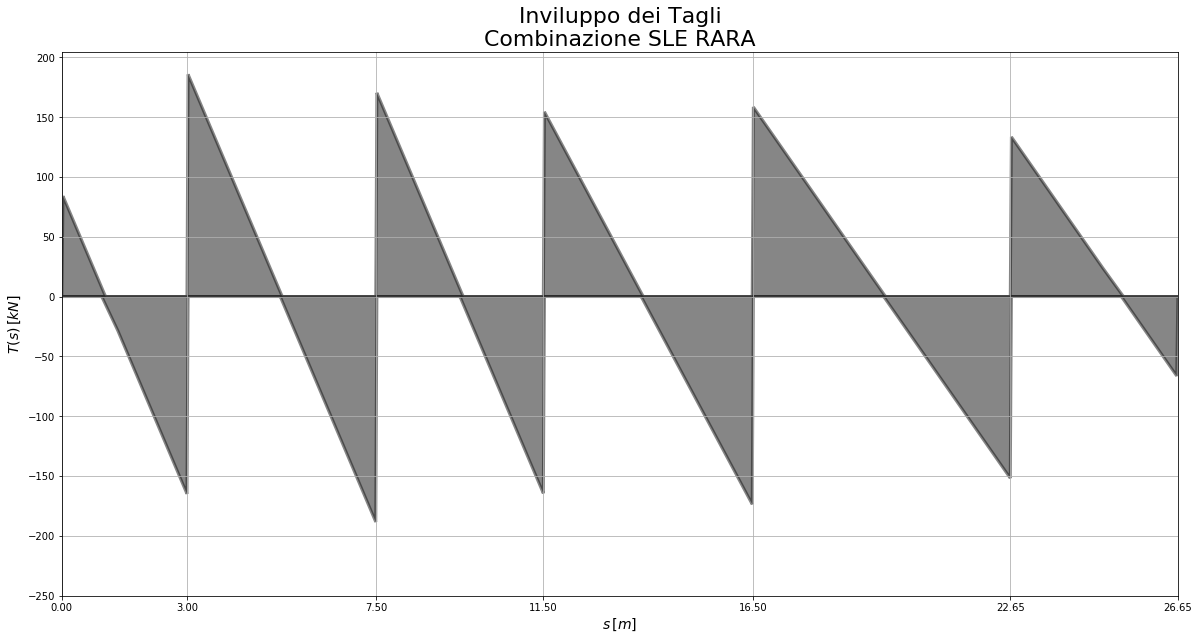

In [76]:
TN1 = T1*Q1max_sle_rara + T2*Q1min_sle_rara + T3*Q1max_sle_rara + T4*Q2min_sle_rara + T5*Q3max_sle_rara + T6*Q3min_sle_rara
TN2 = T1*Q1max_sle_rara + T2*Q1max_sle_rara + T3*Q1min_sle_rara + T4*Q2max_sle_rara + T5*Q3min_sle_rara + T6*Q3max_sle_rara
TN3 = T1*Q1min_sle_rara + T2*Q1max_sle_rara + T3*Q1max_sle_rara + T4*Q2min_sle_rara + T5*Q3max_sle_rara + T6*Q3min_sle_rara
TN4 = T1*Q1max_sle_rara + T2*Q1min_sle_rara + T3*Q1max_sle_rara + T4*Q2max_sle_rara + T5*Q3min_sle_rara + T6*Q3max_sle_rara
TN5 = T1*Q1min_sle_rara + T2*Q1max_sle_rara + T3*Q1min_sle_rara + T4*Q2max_sle_rara + T5*Q3max_sle_rara + T6*Q3min_sle_rara
TN6 = T1*Q1max_sle_rara + T2*Q1min_sle_rara + T3*Q1max_sle_rara + T4*Q2min_sle_rara + T5*Q3max_sle_rara + T6*Q3max_sle_rara
TN7 = T1*Q1min_sle_rara + T2*Q1max_sle_rara + T3*Q1min_sle_rara + T4*Q2max_sle_rara + T5*Q3min_sle_rara + T6*Q3max_sle_rara

Tmax = np.zeros(1000)
Tmin = np.zeros(1000)
for i in range (0, 999):
    Tmax[i] = max(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmax[i] < 0:
        Tmax[i]=0
    Tmin[i] = min(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmin[i] > 0:
        Tmin[i]=0

def shearPlot():
    plt.figure(figsize=(20,10))
    plt.fill(s, Tmax, linewidth='3', color='#0f0f0f80')
    plt.fill(s, Tmin, linewidth='3', color='#0f0f0f80')
    plt.xlim(s.min(), s.max())
    plt.grid()
    plt.xlabel(r'$s\,[m]$', fontsize='14')
    plt.ylabel(r'$T(s)\,[kN]$', fontsize='14')
    plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
    plt.yticks(np.arange(-250, 250, step=50))
    plt.title('Inviluppo dei Tagli\nCombinazione SLE RARA', fontsize='22')
    plt.savefig('export/img/shearEnvelope_sleRara.jpg')
    return plt.show()

shearPlot()

In [77]:
TN1max = Tmax[1]
TN2min = min(Tmin[0:225])
TN2max = max(Tmax[112:225])
TN3min = min(Tmin[250:285])
TN3max = max(Tmax[250:285])
TN4min = min(Tmin[290:435])
TN4max = max(Tmax[290:435])
TN5min = min(Tmin[450:620])
TN5max = max(Tmax[450:620])
TN6min = min(Tmin[650:860])
TN6max = max(Tmax[650:860])
TN7min = min(Tmin[900::])

TEd = pd.DataFrame([
    ['Section','TEd+ [kN]', 'smax [m]', 'TEd- [kN]', 'smin [m]'],
    ['N1', TN1max, 0, 0, 0],
    ['N2', TN2max, 3, TN2min, 3], 
    ['N3', TN3max, 7.5, TN3min, 7.5], 
    ['N4', TN4max, 11.5, TN4min, 11.5], 
    ['N5', TN5max, 16.5, TN5min, 16.5], 
    ['N6', TN6max, 22.65, TN6min, 22.65], 
    ['N7', 0, 26.65, TN7min, 26.65]
])
TEd.columns = TEd.iloc[0]
TEd = TEd.drop([0])
TEd = TEd.set_index('Section')
TEd.to_latex('export/tab/shear_sleRara.tex')
TEd

,TEd+ [kN],smax [m],TEd- [kN],smin [m]
Section,,,,
N1,84.006,0,0,0
N2,185.787,3,-165.029,3
N3,170.316,7.5,-188.546,7.5
N4,154.466,11.5,-164.588,11.5
N5,158.492,16.5,-173.737,16.5
N6,133.49,22.65,-151.89,22.65
N7,0,26.65,-66.4499,26.65


---
## SLE FREQUENTE

In [78]:
Q1max_sle_freq =  8+11.52+3.75 + 11.55+7.98+9.2 + .2*15.01 + .3*(7.5+14.4) + .0*.5
Q2max_sle_freq =  8+6.72+3.75 + 11.55+4.65+9.20 + .2*10.30 + .3*(7.5+8.4) + .0*.3
Q3max_sle_freq = 8+3.2+3.75 + 11.55+2.215+9.20 + 0*4.17 + .5*(7.5)+.3*(4) + .0*.138

Q1min_sle_freq = 8+11.52+3.75 + 11.55+7.98+9.2 + 0*15.01 + .5*(7.5)+ .3*(14.4) + .0*.5
Q2min_sle_freq = 8+6.72+3.75 + 11.55+4.65+9.20 + .0*10.30 + .5*(7.5)+.3*(8.4) + .0*.3
Q3min_sle_freq = 8+3.2+3.75 + 11.55+2.215+9.20 + 0*4.17 + .3*(7.5)+.5*(4) + .0*.138

### BENDING MOMENT

In [79]:
s = np.linspace(0,26.65, num=1000)
MC1_sle_freq = M1*Q1max_sle_freq + M2*Q1min_sle_freq + M3*Q1max_sle_freq + M4*Q2min_sle_freq + M5*Q3max_sle_freq + M6*Q3min_sle_freq
MN2_sle_freq = M1*Q1max_sle_freq + M2*Q1max_sle_freq + M3*Q1min_sle_freq + M4*Q2max_sle_freq + M5*Q3min_sle_freq + M6*Q3max_sle_freq
MC2_sle_freq = M1*Q1min_sle_freq + M2*Q1max_sle_freq + M3*Q1min_sle_freq + M4*Q2max_sle_freq + M5*Q3min_sle_freq + M6*Q3max_sle_freq
MN3_sle_freq = M1*Q1min_sle_freq + M2*Q1max_sle_freq + M3*Q1max_sle_freq + M4*Q2min_sle_freq + M5*Q3max_sle_freq + M6*Q3min_sle_freq
MC3_sle_freq = M1*Q1max_sle_freq + M2*Q1min_sle_freq + M3*Q1max_sle_freq + M4*Q2max_sle_freq + M5*Q3max_sle_freq + M6*Q3min_sle_freq
MN4_sle_freq = M1*Q1max_sle_freq + M2*Q1min_sle_freq + M3*Q1max_sle_freq + M4*Q2max_sle_freq + M5*Q3min_sle_freq + M6*Q3max_sle_freq
MN5_sle_freq = M1*Q1min_sle_freq + M2*Q1max_sle_freq + M3*Q1min_sle_freq + M4*Q2max_sle_freq + M5*Q3max_sle_freq + M6*Q3min_sle_freq
MN6_sle_freq = M1*Q1max_sle_freq + M2*Q1min_sle_freq + M3*Q1max_sle_freq + M4*Q2min_sle_freq + M5*Q3max_sle_freq + M6*Q3max_sle_freq

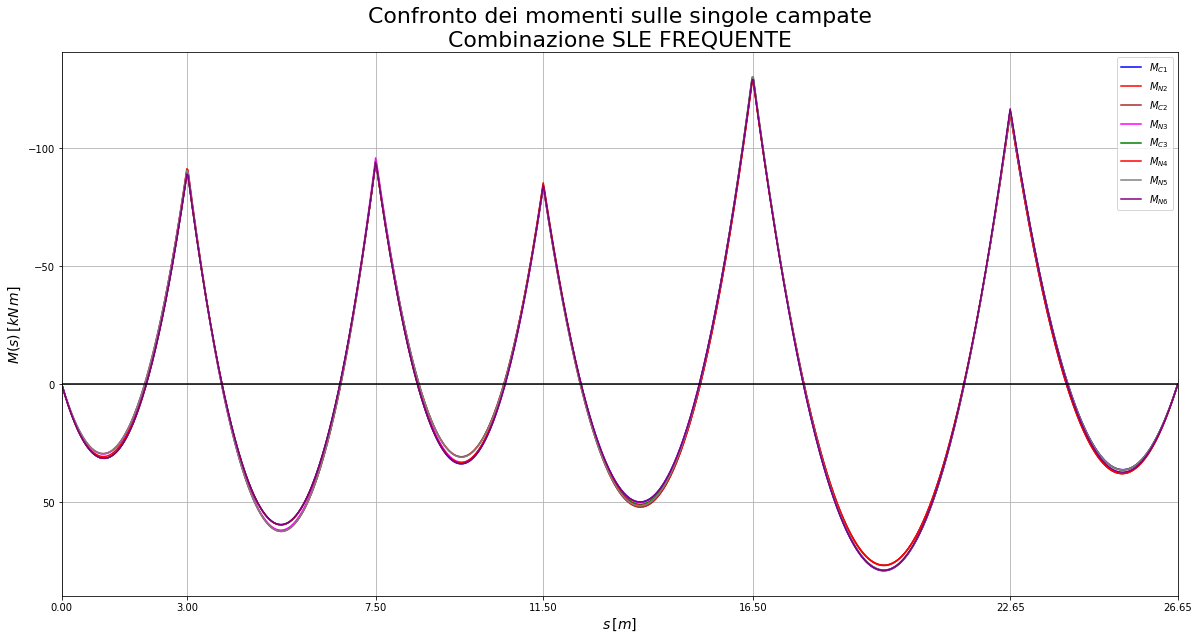

In [80]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1_sle_freq, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2_sle_freq, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2_sle_freq, color='brown', label=r'$M_{C2}$')
plt.plot(s, MN3_sle_freq, color='magenta', label=r'$M_{N3}$')
plt.plot(s, MC3_sle_freq, color='green' , label=r'$M_{C3}$')
plt.plot(s, MN4_sle_freq, color='red', label=r'$M_{N4}$')
plt.plot(s, MN5_sle_freq, color='gray', label=r'$M_{N5}$')
plt.plot(s, MN6_sle_freq, color='purple', label=r'$M_{N6}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei momenti sulle singole campate\nCombinazione SLE FREQUENTE', fontsize='22')
plt.savefig('export/img/bendingMomentComparison_sleFreq.jpg')
plt.show()

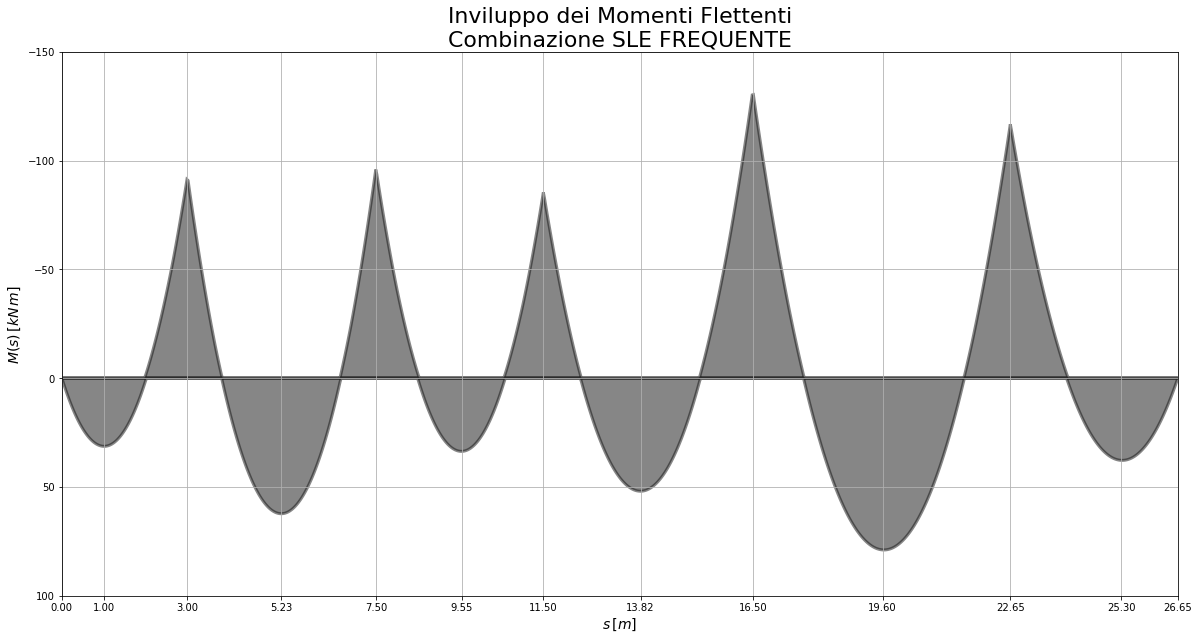

In [81]:
for i in range (0, 999):
    Mmax[i] = max(MC1_sle_freq[i], MN2_sle_freq[i], MC2_sle_freq[i], MN3_sle_freq[i], MC3_sle_freq[i], MN4_sle_freq[i], MN5_sle_freq[i], MN6_sle_freq[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1_sle_freq[i], MN2_sle_freq[i], MC2_sle_freq[i], MN3_sle_freq[i], MC3_sle_freq[i], MN4_sle_freq[i], MN5_sle_freq[i], MN6_sle_freq[i])
    if Mmin[i] > 0:
        Mmin[i]=0
        
MC1max = max(Mmax[0:112])
MN2min = min(Mmin[0:224])
MC2max = max(Mmax[112:281])
MC2min = max(Mmin[112:281])
MN3min = min(Mmin[250:374])
MC3max = max(Mmax[281:431])
MC3min = max(Mmin[281:431])
MN4min = min(Mmin[374:500])
MC4max = max(Mmax[431:618])
MC4min = max(Mmin[431:618])
MN5min = min(Mmin[500:650])
MC5max = max(Mmax[618:849])
MC5min = max(Mmin[618:849])
MN6min = min(Mmin[650::])
MC6max = max(Mmax[849::])

#-----------------------------------

sC1max = smax(MC1max)
sN2min = smin(MN2min)
sC2max = smax(MC2max)
sC2min = smin(MC2min)
sN3min = smin(MN3min)
sC3max = smax(MC3max)
sC3min = smin(MC3min)
sN4min = smin(MN4min)
sC4max = smax(MC4max)
sC4min = smin(MC4min)
sN5min = smin(MN5min)
sC5max = smax(MC5max)
sC5min = smin(MC5min)
sN6min = smin(MN6min)
sC6max = smax(MC6max)

#---------------------------------------------------------------------


plt.figure(figsize=(20,10))
plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
round(sC1max, 1), round(sC2max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 1), round(sC6max, 1)])
plt.yticks(np.arange(-150, 150, step=50))
plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLE FREQUENTE', fontsize='22')
plt.savefig('export/img/bendingMomentEnvelope_sleFreq.jpg')
plt.show()

In [82]:
MEd_sle_freq = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'smax [m]', 'MEd- [kN m]', 'smin [m]'],
    ['C1', MC1max, round(sC1max, 1), 'NaN', 'NaN'],
    ['N2', 'NaN', 'NaN', MN2min, round(sN2min)], 
    ['C2', MC2max, round(sC2max, 2), MC2min, sC2min],
    ['N3', 'NaN', 'NaN', MN3min, round(sN3min, 2)], 
    ['C3', MC3max, round(sC3max, 2), MC3min, sC3min],
    ['N4', 'NaN', 'NaN', MN4min, round(sN4min, 1)], 
    ['C4', MC4max, round(sC4max, 2), MC4min, sC4min],
    ['N5', 'NaN', 'NaN', MN5min, round(sN5min, 1)], 
    ['C5', MC5max, round(sC5max, 1), MC5min, sC5min],
    ['N6', 'NaN', 'NaN', MN6min, round(sN6min, 2)], 
    ['C6', MC6max, round(sC6max), 'NaN', 'NaN']
])
MEd_sle_freq.columns = MEd_sle_freq.iloc[0]
MEd_sle_freq = MEd_sle_freq.drop([0])
MEd_sle_freq = MEd_sle_freq.set_index('Section')
MEd_sle_freq.to_latex('export/tab/bendingMoment_sleFreq.tex')
MEd_sle_freq

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,31.3916,1,NaN,NaN
N2,NaN,NaN,-91.3156,3
C2,62.3719,5.23,0,NaN
N3,NaN,NaN,-95.9325,7.5
C3,33.7056,9.55,0,NaN
N4,NaN,NaN,-85.3944,11.5
C4,52.0246,13.82,0,NaN
N5,NaN,NaN,-130.362,16.5
C5,79.0371,19.6,0,NaN


---
### SHEAR

In [83]:
s = np.linspace(0,26.65, num=1000)
TC1_sle_freq = T1*Q1max_sle_freq + T2*Q1min_sle_freq + T3*Q1max_sle_freq + T4*Q2min_sle_freq + T5*Q3max_sle_freq + T6*Q3min_sle_freq
TN2_sle_freq = T1*Q1max_sle_freq + T2*Q1max_sle_freq + T3*Q1min_sle_freq + T4*Q2max_sle_freq + T5*Q3min_sle_freq + T6*Q3max_sle_freq
TC2_sle_freq = T1*Q1min_sle_freq + T2*Q1max_sle_freq + T3*Q1min_sle_freq + T4*Q2max_sle_freq + T5*Q3min_sle_freq + T6*Q3max_sle_freq
TN3_sle_freq = T1*Q1min_sle_freq + T2*Q1max_sle_freq + T3*Q1max_sle_freq + T4*Q2min_sle_freq + T5*Q3max_sle_freq + T6*Q3min_sle_freq
TC3_sle_freq = T1*Q1max_sle_freq + T2*Q1min_sle_freq + T3*Q1max_sle_freq + T4*Q2max_sle_freq + T5*Q3max_sle_freq + T6*Q3min_sle_freq
TN4_sle_freq = T1*Q1max_sle_freq + T2*Q1min_sle_freq + T3*Q1max_sle_freq + T4*Q2max_sle_freq + T5*Q3min_sle_freq + T6*Q3max_sle_freq
TN5_sle_freq = T1*Q1min_sle_freq + T2*Q1max_sle_freq + T3*Q1min_sle_freq + T4*Q2max_sle_freq + T5*Q3max_sle_freq + T6*Q3min_sle_freq
TN6_sle_freq = T1*Q1max_sle_freq + T2*Q1min_sle_freq + T3*Q1max_sle_freq + T4*Q2min_sle_freq + T5*Q3max_sle_freq + T6*Q3max_sle_freq

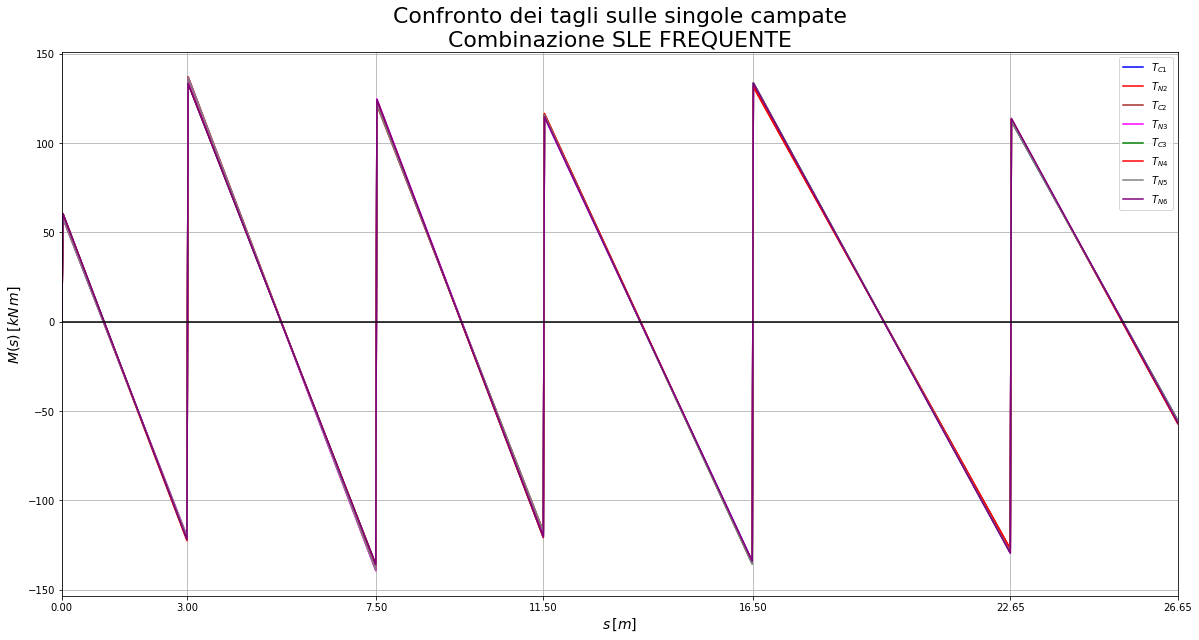

In [84]:
plt.figure(figsize=(20,10))
plt.plot(s, TC1_sle_freq, color='blue', label=r'$T_{C1}$')
plt.plot(s, TN2_sle_freq, color='red', label=r'$T_{N2}$')
plt.plot(s, TC2_sle_freq, color='brown', label=r'$T_{C2}$')
plt.plot(s, TN3_sle_freq, color='magenta', label=r'$T_{N3}$')
plt.plot(s, TC3_sle_freq, color='green' , label=r'$T_{C3}$')
plt.plot(s, TN4_sle_freq, color='red', label=r'$T_{N4}$')
plt.plot(s, TN5_sle_freq, color='gray', label=r'$T_{N5}$')
plt.plot(s, TN6_sle_freq, color='purple', label=r'$T_{N6}$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei tagli sulle singole campate\nCombinazione SLE FREQUENTE', fontsize='22')
plt.savefig('export/img/shear_sleFreq.jpg')
plt.show()

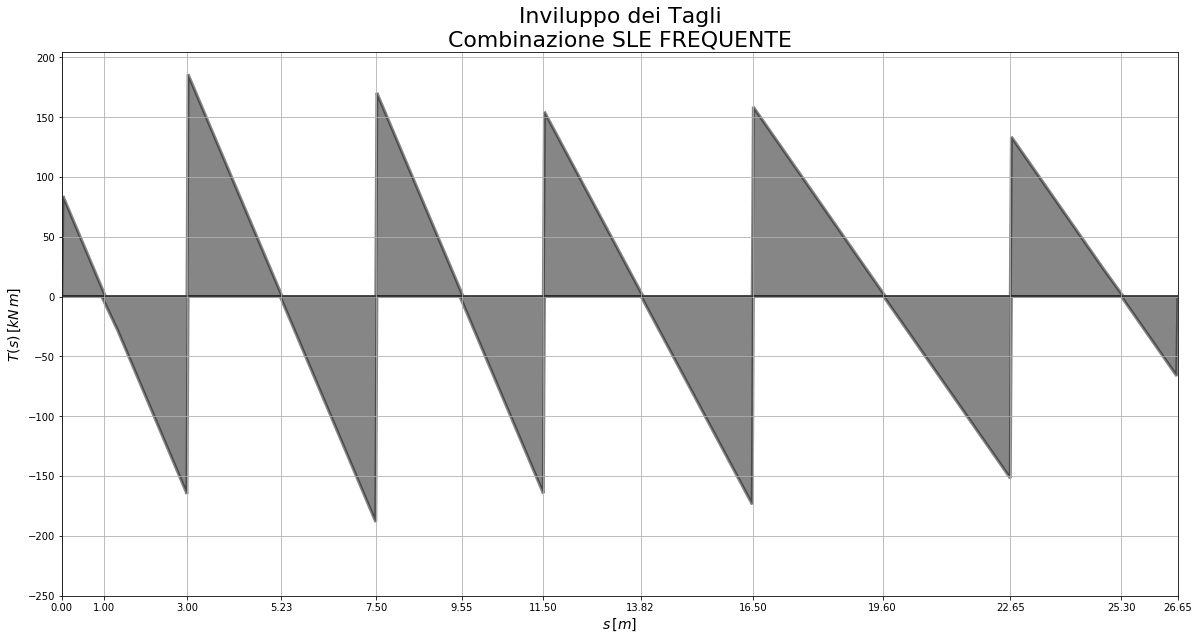

In [85]:
Tmax = np.zeros(1000)
Tmin = np.zeros(1000)
for i in range (0, 999):
    Tmax[i] = max(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmax[i] < 0:
        Tmax[i]=0
    Tmin[i] = min(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmin[i] > 0:
        Tmin[i]=0
        

TN1max = Tmax[1]
TN2min = min(Tmin[0:225])
TN2max = max(Tmax[112:225])
TN3min = min(Tmin[250:285])
TN3max = max(Tmax[250:285])
TN4min = min(Tmin[290:435])
TN4max = max(Tmax[290:435])
TN5min = min(Tmin[450:620])
TN5max = max(Tmax[450:620])
TN6min = min(Tmin[650:860])
TN6max = max(Tmax[650:860])
TN7min = min(Tmin[900::])

#-----------------------------------------------------
plt.figure(figsize=(20,10))
plt.fill(s, Tmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Tmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
round(sC1max, 1), round(sC2max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 1), round(sC6max, 1)])
plt.yticks(np.arange(-250, 250, step=50))
plt.title('Inviluppo dei Tagli\nCombinazione SLE FREQUENTE', fontsize='22')
plt.savefig('export/img/shearEnvelope_sleFreq.jpg')
plt.show()

In [86]:
TEd_sle_freq = pd.DataFrame([
    ['Section','TEd+ [kN]', 'smax [m]', 'TEd- [kN]', 'smin [m]'],
    ['N1', TN1max, 0, 0, 0],
    ['N2', TN2max, 3, TN2min, 3], 
    ['N3', TN3max, 7.5, TN3min, 7.5], 
    ['N4', TN4max, 11.5, TN4min, 11.5], 
    ['N5', TN5max, 16.5, TN5min, 16.5], 
    ['N6', TN6max, 22.65, TN6min, 22.65], 
    ['N7', 0, 26.65, TN7min, 26.65]
])
TEd_sle_freq.columns = TEd_sle_freq.iloc[0]
TEd_sle_freq = TEd_sle_freq.drop([0])
TEd_sle_freq = TEd_sle_freq.set_index('Section')
TEd_sle_freq.to_latex('export/tab/shear_sleFreq.tex')
TEd_sle_freq

,TEd+ [kN],smax [m],TEd- [kN],smin [m]
Section,,,,
N1,84.006,0,0,0
N2,185.787,3,-165.029,3
N3,170.316,7.5,-188.546,7.5
N4,154.466,11.5,-164.588,11.5
N5,158.492,16.5,-173.737,16.5
N6,133.49,22.65,-151.89,22.65
N7,0,26.65,-66.4499,26.65


---
## SLE QUASI PERMANENTE

In [87]:
Q1_sle_qp = 8+11.52+3.75 + 11.55+7.98+9.2 + 0*15.01 + .3*(7.5+14.4) + .0*.5
Q2_sle_qp = 8+6.72+3.75 + 11.55+4.65+9.20 + 0*10.30 + .3*(7.5+8.4) + .0*.3
Q3_sle_qp = 8+3.2+3.75 + 11.55+2.215+9.20 + 0*4.17 + .3*(7.5+4) + .0*.138

### BENDING MOMENT

In [88]:
s = np.linspace(0,26.65, num=1000)
MC1_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MN2_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MC2_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MN3_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MC3_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MN4_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MN5_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp
MN6_sle_qp = M1*Q1_sle_qp + M2*Q1_sle_qp + M3*Q1_sle_qp + M4*Q2_sle_qp + M5*Q3_sle_qp + M6*Q3_sle_qp

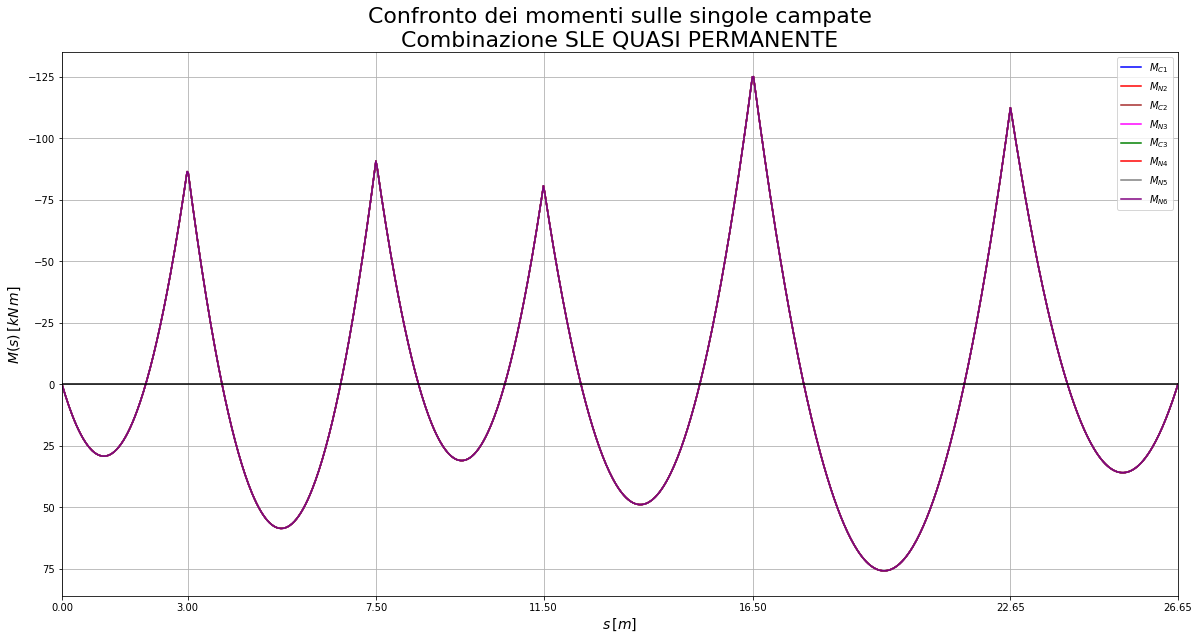

In [96]:
plt.figure(figsize=(20,10))
plt.plot(s, MC1_sle_qp, color='blue', label=r'$M_{C1}$')
plt.plot(s, MN2_sle_qp, color='red', label=r'$M_{N2}$')
plt.plot(s, MC2_sle_qp, color='brown', label=r'$M_{C2}$')
plt.plot(s, MN3_sle_qp, color='magenta', label=r'$M_{N3}$')
plt.plot(s, MC3_sle_qp, color='green' , label=r'$M_{C3}$')
plt.plot(s, MN4_sle_qp, color='red', label=r'$M_{N4}$')
plt.plot(s, MN5_sle_qp, color='gray', label=r'$M_{N5}$')
plt.plot(s, MN6_sle_qp, color='purple', label=r'$M_{N6}$')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei momenti sulle singole campate\nCombinazione SLE QUASI PERMANENTE', fontsize='22')
plt.savefig('export/img/bendingMomentComparison_sleQP.jpg')
plt.show()

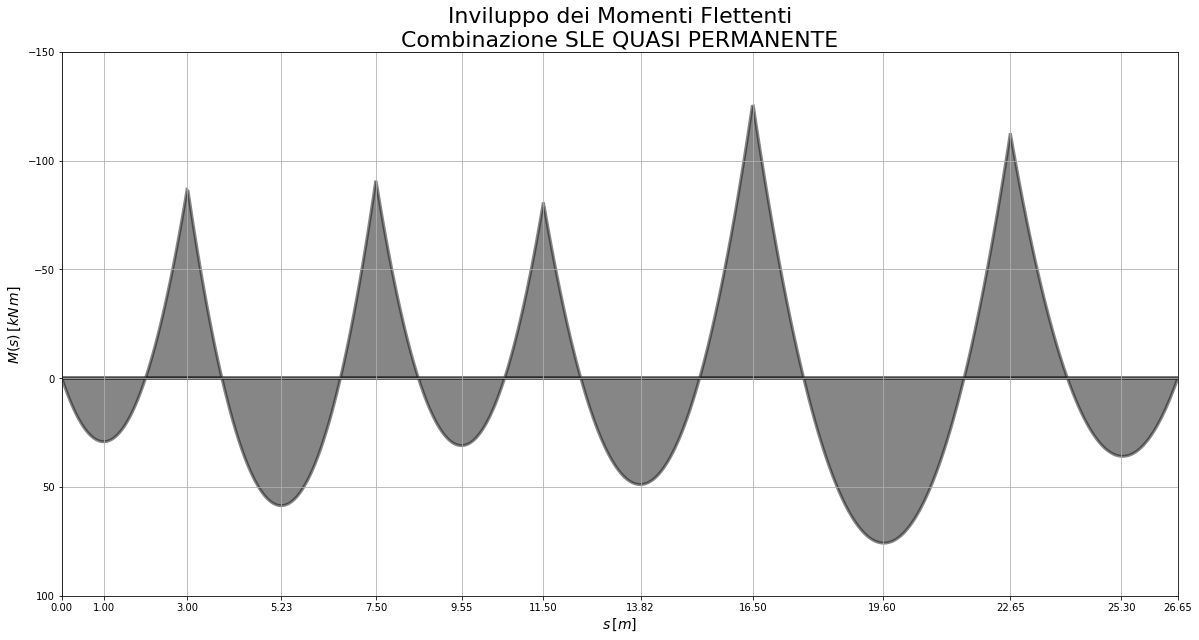

In [90]:
for i in range (0, 999):
    Mmax[i] = max(MC1_sle_qp[i], MN2_sle_qp[i], MC2_sle_qp[i], MN3_sle_qp[i], MC3_sle_qp[i], MN4_sle_qp[i], MN5_sle_qp[i], MN6_sle_qp[i])
    if Mmax[i] < 0:
        Mmax[i]=0
    Mmin[i] = min(MC1_sle_qp[i], MN2_sle_qp[i], MC2_sle_qp[i], MN3_sle_qp[i], MC3_sle_qp[i], MN4_sle_qp[i], MN5_sle_qp[i], MN6_sle_qp[i])
    if Mmin[i] > 0:
        Mmin[i]=0
        
MC1max = max(Mmax[0:112])
MN2min = min(Mmin[0:224])
MC2max = max(Mmax[112:281])
MC2min = max(Mmin[112:281])
MN3min = min(Mmin[250:374])
MC3max = max(Mmax[281:431])
MC3min = max(Mmin[281:431])
MN4min = min(Mmin[374:500])
MC4max = max(Mmax[431:618])
MC4min = max(Mmin[431:618])
MN5min = min(Mmin[500:650])
MC5max = max(Mmax[618:849])
MC5min = max(Mmin[618:849])
MN6min = min(Mmin[650::])
MC6max = max(Mmax[849::])

#-----------------------------------

sC1max = smax(MC1max)
sN2min = smin(MN2min)
sC2max = smax(MC2max)
sC2min = smin(MC2min)
sN3min = smin(MN3min)
sC3max = smax(MC3max)
sC3min = smin(MC3min)
sN4min = smin(MN4min)
sC4max = smax(MC4max)
sC4min = smin(MC4min)
sN5min = smin(MN5min)
sC5max = smax(MC5max)
sC5min = smin(MC5min)
sN6min = smin(MN6min)
sC6max = smax(MC6max)

#---------------------------------------------------------------------


plt.figure(figsize=(20,10))
plt.fill(s, Mmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Mmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
round(sC1max, 1), round(sC2max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 1), round(sC6max, 1)])
plt.yticks(np.arange(-150, 150, step=50))
plt.title('Inviluppo dei Momenti Flettenti\nCombinazione SLE QUASI PERMANENTE', fontsize='22')
plt.savefig('export/img/bendingMomentEnvelope_sleQP.jpg')
plt.show()

In [91]:
MEd_sle_qp = pd.DataFrame([
    ['Section','MEd+ [kN m]', 'smax [m]', 'MEd- [kN m]', 'smin [m]'],
    ['C1', MC1max, round(sC1max, 1), 'NaN', 'NaN'],
    ['N2', 'NaN', 'NaN', MN2min, round(sN2min)], 
    ['C2', MC2max, round(sC2max, 2), MC2min, sC2min],
    ['N3', 'NaN', 'NaN', MN3min, round(sN3min, 2)], 
    ['C3', MC3max, round(sC3max, 2), MC3min, sC3min],
    ['N4', 'NaN', 'NaN', MN4min, round(sN4min, 1)], 
    ['C4', MC4max, round(sC4max, 2), MC4min, sC4min],
    ['N5', 'NaN', 'NaN', MN5min, round(sN5min, 1)], 
    ['C5', MC5max, round(sC5max, 1), MC5min, sC5min],
    ['N6', 'NaN', 'NaN', MN6min, round(sN6min, 2)], 
    ['C6', MC6max, round(sC6max, 2), 'NaN', 'NaN']
])
MEd_sle_qp.columns = MEd_sle_qp.iloc[0]
MEd_sle_qp = MEd_sle_qp.drop([0])
MEd_sle_qp = MEd_sle_qp.set_index('Section')
MEd_sle_qp.to_latex('export/tab/bendingMoment_sleQP.tex')
MEd_sle_qp

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,29.2567,1,NaN,NaN
N2,NaN,NaN,-86.4996,3
C2,58.6555,5.23,0,NaN
N3,NaN,NaN,-90.7684,7.5
C3,31.0543,9.55,0,NaN
N4,NaN,NaN,-80.7336,11.5
C4,48.9643,13.82,0,NaN
N5,NaN,NaN,-125.128,16.5
C5,75.8908,19.6,0,NaN


---
### SHEAR

In [92]:
s = np.linspace(0,26.65, num=1000)
TC1_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TN2_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TC2_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TN3_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TC3_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TN4_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TN5_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp
TN6_sle_qp = T1*Q1_sle_qp + T2*Q1_sle_qp + T3*Q1_sle_qp + T4*Q2_sle_qp + T5*Q3_sle_qp + T6*Q3_sle_qp

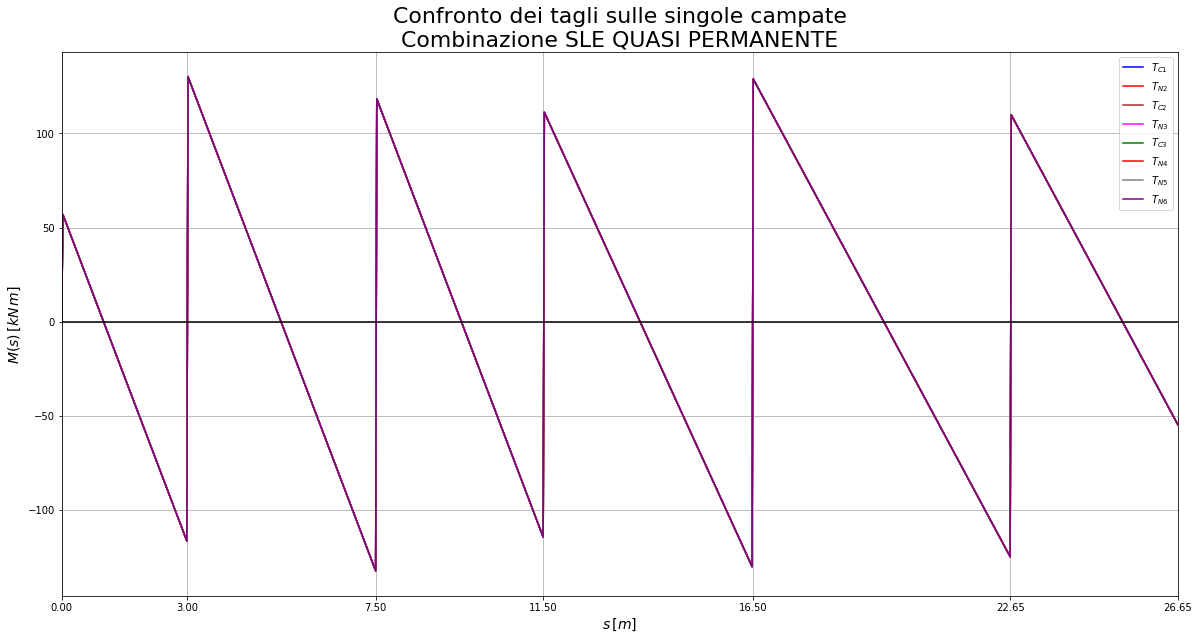

In [93]:
plt.figure(figsize=(20,10))
plt.plot(s, TC1_sle_qp, color='blue', label=r'$T_{C1}$')
plt.plot(s, TN2_sle_qp, color='red', label=r'$T_{N2}$')
plt.plot(s, TC2_sle_qp, color='brown', label=r'$T_{C2}$')
plt.plot(s, TN3_sle_qp, color='magenta', label=r'$T_{N3}$')
plt.plot(s, TC3_sle_qp, color='green' , label=r'$T_{C3}$')
plt.plot(s, TN4_sle_qp, color='red', label=r'$T_{N4}$')
plt.plot(s, TN5_sle_qp, color='gray', label=r'$T_{N5}$')
plt.plot(s, TN6_sle_qp, color='purple', label=r'$T_{N6}$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M (s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Confronto dei tagli sulle singole campate\nCombinazione SLE QUASI PERMANENTE', fontsize='22')
plt.savefig('export/img/shear_sleQP.jpg')
plt.show()

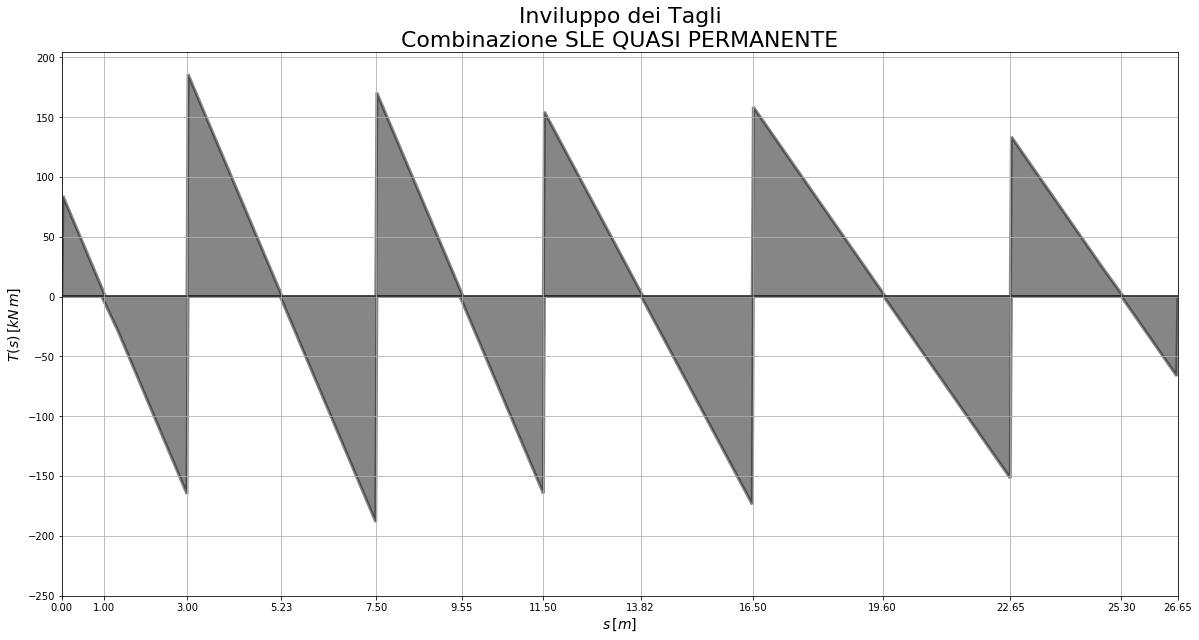

In [97]:
Tmax = np.zeros(1000)
Tmin = np.zeros(1000)
for i in range (0, 999):
    Tmax[i] = max(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmax[i] < 0:
        Tmax[i]=0
    Tmin[i] = min(TN1[i], TN2[i], TN3[i], TN4[i], TN5[i], TN6[i], TN7[i])
    if Tmin[i] > 0:
        Tmin[i]=0
        

TN1max = Tmax[1]
TN2min = min(Tmin[0:225])
TN2max = max(Tmax[112:225])
TN3min = min(Tmin[250:285])
TN3max = max(Tmax[250:285])
TN4min = min(Tmin[290:435])
TN4max = max(Tmax[290:435])
TN5min = min(Tmin[450:620])
TN5max = max(Tmax[450:620])
TN6min = min(Tmin[650:860])
TN6max = max(Tmax[650:860])
TN7min = min(Tmin[900::])

#-----------------------------------------------------
plt.figure(figsize=(20,10))
plt.fill(s, Tmax, linewidth='3', color='#0f0f0f80')
plt.fill(s, Tmin, linewidth='3', color='#0f0f0f80')
plt.xlim(s.min(), s.max())
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$T(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65,
round(sC1max, 1), round(sC2max, 2), round(sC3max, 2), round(sC4max, 2), round(sC5max, 1), round(sC6max, 1)])
plt.yticks(np.arange(-250, 250, step=50))
plt.title('Inviluppo dei Tagli\nCombinazione SLE QUASI PERMANENTE', fontsize='22')
plt.savefig('export/img/shearEnvelope_sleQP.jpg')
plt.show()

In [95]:
TEd_sle_qp = pd.DataFrame([
    ['Section','TEd+ [kN]', 'smax [m]', 'TEd- [kN]', 'smin [m]'],
    ['N1', TN1max, 0, 0, 0],
    ['N2', TN2max, 3, TN2min, 3], 
    ['N3', TN3max, 7.5, TN3min, 7.5], 
    ['N4', TN4max, 11.5, TN4min, 11.5], 
    ['N5', TN5max, 16.5, TN5min, 16.5], 
    ['N6', TN6max, 22.65, TN6min, 22.65], 
    ['N7', 0, 26.65, TN7min, 26.65]
])
TEd_sle_qp.columns = TEd_sle_qp.iloc[0]
TEd_sle_qp = TEd_sle_qp.drop([0])
TEd_sle_qp = TEd_sle_qp.set_index('Section')
TEd_sle_qp.to_latex('export/tab/shear_sleQP.tex')
TEd_sle_qp

,TEd+ [kN],smax [m],TEd- [kN],smin [m]
Section,,,,
N1,84.006,0,0,0
N2,185.787,3,-165.029,3
N3,170.316,7.5,-188.546,7.5
N4,154.466,11.5,-164.588,11.5
N5,158.492,16.5,-173.737,16.5
N6,133.49,22.65,-151.89,22.65
N7,0,26.65,-66.4499,26.65
